# 📊Fashion Trends

## 1: Import Libraries
###  📌Importing essential libraries:
###  📌numpy & pandas for data handling
###  📌seaborn & matplotlib for visualization


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

## 2 : Load & Preview Dataset

In [4]:
df=pd.read_csv("../Practice/Fashion_Trends.csv")
df


,Brand,Description,Image_URL,Product_ID,Discount_Price (in Rs.),Original_Price (in Rs.),Product_URL,Category_by_gender,Category
0,performax,Typographic Print Track Pants with Insert Pockets,https://assets.ajio.com/medias/sys_master/root...,441136763008,974,"1,299",https://trends.ajio.com/performax-typographic-...,Men,Activewear
1,performax,Low-Top Lace-Up Sports Shoes,https://assets.ajio.com/medias/sys_master/root...,450137679013,"1,499","1,499",https://trends.ajio.com/performax-low-top-lace...,Men,Activewear
2,teamspirit,Colorblock Crew-Neck T-shirt,https://assets.ajio.com/medias/sys_master/root...,441133214008,461,549,https://trends.ajio.com/teamspirit-colorblock-...,Men,Activewear
3,performax,Camouflage Print Joggers with Insert Pockets,https://assets.ajio.com/medias/sys_master/root...,441134776020,"1,189","1,699",https://trends.ajio.com/performax-camouflage-p...,Men,Activewear
4,teamspirit,Reflective Colourblock Crew-Neck T-shirt,https://assets.ajio.com/medias/sys_master/root...,441136539020,425,599,https://trends.ajio.com/teamspirit-reflective-...,Men,Activewear
...,...,...,...,...,...,...,...,...,...
31577,ajio,Printed Top with Raglan Sleeves,https://assets.ajio.com/medias/sys_master/root...,460328028004,"1,299","1,299",https://trends.ajio.com/ajio-printed-top-with-...,Women,Westernwear
31578,ajio,Striped Cropped Pants with Belt,https://assets.ajio.com/medias/sys_master/root...,460328036004,"2,099","2,099",https://trends.ajio.com/ajio-striped-cropped-p...,Women,Westernwear
31579,ajio,Striped City Shorts with Belt,https://assets.ajio.com/medias/sys_master/root...,460328005002,"1,499","1,499",https://trends.ajio.com/ajio-striped-city-shor...,Women,Westernwear
31580,ajio,Denim Jacket with Frayed Hemline,https://assets.ajio.com/medias/sys_master/root...,460328651009,"2,999","2,999",https://trends.ajio.com/ajio-denim-jacket-with...,Women,Westernwear


# 3. Data Preparation:

### 🔍Checking Null Values

In [5]:
df.isnull().sum() 

Brand                      0
Description                0
Image_URL                  0
Product_ID                 0
Discount_Price (in Rs.)    0
Original_Price (in Rs.)    0
Product_URL                0
Category_by_gender         0
Category                   0
dtype: int64

 #### ✔️ No missing values across any of the 9 columns. The dataset is clean and ready for analysis without imputation.

### 🔍Check Data Types

In [6]:
df.dtypes

Brand                      object
Description                object
Image_URL                  object
Product_ID                  int64
Discount_Price (in Rs.)    object
Original_Price (in Rs.)    object
Product_URL                object
Category_by_gender         object
Category                   object
dtype: object

### 📌 Insight:
#### Price columns are in object (string) format. You'll need to convert them to numeric types for accurate analysis.
#### Other columns like Brand, Category are correctly typed as object.
#### Product_ID is int64, which is fine.

### 🔍Descriptive Statistics

In [7]:
df.describe()

,Product_ID
count,3.158200e+04
mean,4.439001e+11
std,5.715579e+09
min,4.200088e+11
25%,4.411142e+11
50%,4.411360e+11
75%,4.501273e+11
max,4.608526e+11


### 📌 Insight:
#### Only Product_ID is currently numeric, so it's the only one described here.
#### Product IDs range from 4.2e+11 to 4.6e+11, with a mean of 4.44e+11.
#### You’ll need to convert price columns to numeric to analyze price distributions (mean, max, etc.).

### Cleaning Price Columns

In [8]:
df["Discount_Price (in Rs.)"] = df["Discount_Price (in Rs.)"].astype(str).str.replace(",", "").astype(float)
df["Original_Price (in Rs.)"] = df["Original_Price (in Rs.)"].astype(str).str.replace(",", "").astype(float)

### 📌 Insight:
#### You correctly cleaned and converted price columns from strings to floats.
#### This enables accurate statistical analysis, like discount calculation and tier segmentation.

In [9]:
df.dtypes

Brand                       object
Description                 object
Image_URL                   object
Product_ID                   int64
Discount_Price (in Rs.)    float64
Original_Price (in Rs.)    float64
Product_URL                 object
Category_by_gender          object
Category                    object
dtype: object

In [10]:
df.describe()

,Product_ID,Discount_Price (in Rs.),Original_Price (in Rs.)
count,3.158200e+04,31582.000000,31582.000000
mean,4.439001e+11,929.759832,1418.094769
std,5.715579e+09,727.207471,945.684511
min,4.200088e+11,75.000000,149.000000
25%,4.411142e+11,479.000000,799.000000
50%,4.411360e+11,735.000000,1299.000000
75%,4.501273e+11,1199.000000,1799.000000
max,4.608526e+11,16999.000000,19999.000000


### Creating Discount Percentage Column

In [11]:
df["Discount_Percentage"] = ((df["Original_Price (in Rs.)"] - df["Discount_Price (in Rs.)"]) /df["Original_Price (in Rs.)"]) * 100


In [12]:
df["Discount_Percentage"] = df["Discount_Percentage"].round(2)

In [13]:
df

,Brand,Description,Image_URL,Product_ID,Discount_Price (in Rs.),Original_Price (in Rs.),Product_URL,Category_by_gender,Category,Discount_Percentage
0,performax,Typographic Print Track Pants with Insert Pockets,https://assets.ajio.com/medias/sys_master/root...,441136763008,974.0,1299.0,https://trends.ajio.com/performax-typographic-...,Men,Activewear,25.02
1,performax,Low-Top Lace-Up Sports Shoes,https://assets.ajio.com/medias/sys_master/root...,450137679013,1499.0,1499.0,https://trends.ajio.com/performax-low-top-lace...,Men,Activewear,0.00
2,teamspirit,Colorblock Crew-Neck T-shirt,https://assets.ajio.com/medias/sys_master/root...,441133214008,461.0,549.0,https://trends.ajio.com/teamspirit-colorblock-...,Men,Activewear,16.03
3,performax,Camouflage Print Joggers with Insert Pockets,https://assets.ajio.com/medias/sys_master/root...,441134776020,1189.0,1699.0,https://trends.ajio.com/performax-camouflage-p...,Men,Activewear,30.02
4,teamspirit,Reflective Colourblock Crew-Neck T-shirt,https://assets.ajio.com/medias/sys_master/root...,441136539020,425.0,599.0,https://trends.ajio.com/teamspirit-reflective-...,Men,Activewear,29.05
...,...,...,...,...,...,...,...,...,...,...
31577,ajio,Printed Top with Raglan Sleeves,https://assets.ajio.com/medias/sys_master/root...,460328028004,1299.0,1299.0,https://trends.ajio.com/ajio-printed-top-with-...,Women,Westernwear,0.00
31578,ajio,Striped Cropped Pants with Belt,https://assets.ajio.com/medias/sys_master/root...,460328036004,2099.0,2099.0,https://trends.ajio.com/ajio-striped-cropped-p...,Women,Westernwear,0.00
31579,ajio,Striped City Shorts with Belt,https://assets.ajio.com/medias/sys_master/root...,460328005002,1499.0,1499.0,https://trends.ajio.com/ajio-striped-city-shor...,Women,Westernwear,0.00
31580,ajio,Denim Jacket with Frayed Hemline,https://assets.ajio.com/medias/sys_master/root...,460328651009,2999.0,2999.0,https://trends.ajio.com/ajio-denim-jacket-with...,Women,Westernwear,0.00


### 📌 Insight:
#### This new column helps identify the level of discount for each product.
#### Enables segmentation into discount tiers (e.g., low, medium, high discounts).

In [14]:
df = df.drop(['Image_URL', 'Product_URL'], axis=1)

In [15]:
df

,Brand,Description,Product_ID,Discount_Price (in Rs.),Original_Price (in Rs.),Category_by_gender,Category,Discount_Percentage
0,performax,Typographic Print Track Pants with Insert Pockets,441136763008,974.0,1299.0,Men,Activewear,25.02
1,performax,Low-Top Lace-Up Sports Shoes,450137679013,1499.0,1499.0,Men,Activewear,0.00
2,teamspirit,Colorblock Crew-Neck T-shirt,441133214008,461.0,549.0,Men,Activewear,16.03
3,performax,Camouflage Print Joggers with Insert Pockets,441134776020,1189.0,1699.0,Men,Activewear,30.02
4,teamspirit,Reflective Colourblock Crew-Neck T-shirt,441136539020,425.0,599.0,Men,Activewear,29.05
...,...,...,...,...,...,...,...,...
31577,ajio,Printed Top with Raglan Sleeves,460328028004,1299.0,1299.0,Women,Westernwear,0.00
31578,ajio,Striped Cropped Pants with Belt,460328036004,2099.0,2099.0,Women,Westernwear,0.00
31579,ajio,Striped City Shorts with Belt,460328005002,1499.0,1499.0,Women,Westernwear,0.00
31580,ajio,Denim Jacket with Frayed Hemline,460328651009,2999.0,2999.0,Women,Westernwear,0.00


### Creating Discount Tier

In [16]:
def discount_tier(discount):
    if discount == 0:
        return "No Discount"
    elif discount < 20:
        return "Light discount"
    elif 20 <= discount < 40:
        return "Moderate discount"
    else:
        return "Heavy discount"
    

In [17]:
df["Discount_Tier"] = df["Discount_Percentage"].apply(discount_tier)


In [18]:
df

,Brand,Description,Product_ID,Discount_Price (in Rs.),Original_Price (in Rs.),Category_by_gender,Category,Discount_Percentage,Discount_Tier
0,performax,Typographic Print Track Pants with Insert Pockets,441136763008,974.0,1299.0,Men,Activewear,25.02,Moderate discount
1,performax,Low-Top Lace-Up Sports Shoes,450137679013,1499.0,1499.0,Men,Activewear,0.00,No Discount
2,teamspirit,Colorblock Crew-Neck T-shirt,441133214008,461.0,549.0,Men,Activewear,16.03,Light discount
3,performax,Camouflage Print Joggers with Insert Pockets,441134776020,1189.0,1699.0,Men,Activewear,30.02,Moderate discount
4,teamspirit,Reflective Colourblock Crew-Neck T-shirt,441136539020,425.0,599.0,Men,Activewear,29.05,Moderate discount
...,...,...,...,...,...,...,...,...,...
31577,ajio,Printed Top with Raglan Sleeves,460328028004,1299.0,1299.0,Women,Westernwear,0.00,No Discount
31578,ajio,Striped Cropped Pants with Belt,460328036004,2099.0,2099.0,Women,Westernwear,0.00,No Discount
31579,ajio,Striped City Shorts with Belt,460328005002,1499.0,1499.0,Women,Westernwear,0.00,No Discount
31580,ajio,Denim Jacket with Frayed Hemline,460328651009,2999.0,2999.0,Women,Westernwear,0.00,No Discount


### 📌 Insight:
#### Discount tier classification lets you analyze pricing strategies.
#### Majority of deep-discounted products can now be grouped into “High” tier for deeper insight.

### Creating Price Tier

In [19]:
def price_tier(price):
    if price <= 500:
        return "budget friendly"
    elif 500 < price <= 2000:
        return "reasonable"
    elif 2000 < price <= 4000:
        return "premium"
    else:
        return "Luxury"
    

In [21]:
df["Price_Tier"] = df["Original_Price (in Rs.)"].apply(price_tier)

In [22]:
df

,Brand,Description,Product_ID,Discount_Price (in Rs.),Original_Price (in Rs.),Category_by_gender,Category,Discount_Percentage,Discount_Tier,Price_Tier
0,performax,Typographic Print Track Pants with Insert Pockets,441136763008,974.0,1299.0,Men,Activewear,25.02,Moderate discount,reasonable
1,performax,Low-Top Lace-Up Sports Shoes,450137679013,1499.0,1499.0,Men,Activewear,0.00,No Discount,reasonable
2,teamspirit,Colorblock Crew-Neck T-shirt,441133214008,461.0,549.0,Men,Activewear,16.03,Light discount,reasonable
3,performax,Camouflage Print Joggers with Insert Pockets,441134776020,1189.0,1699.0,Men,Activewear,30.02,Moderate discount,reasonable
4,teamspirit,Reflective Colourblock Crew-Neck T-shirt,441136539020,425.0,599.0,Men,Activewear,29.05,Moderate discount,reasonable
...,...,...,...,...,...,...,...,...,...,...
31577,ajio,Printed Top with Raglan Sleeves,460328028004,1299.0,1299.0,Women,Westernwear,0.00,No Discount,reasonable
31578,ajio,Striped Cropped Pants with Belt,460328036004,2099.0,2099.0,Women,Westernwear,0.00,No Discount,premium
31579,ajio,Striped City Shorts with Belt,460328005002,1499.0,1499.0,Women,Westernwear,0.00,No Discount,reasonable
31580,ajio,Denim Jacket with Frayed Hemline,460328651009,2999.0,2999.0,Women,Westernwear,0.00,No Discount,premium


### 📌 Insight:
#### Products are now segmented into budget categories.
#### This helps understand brand positioning (e.g., premium vs mass-market products).

### Extract Product Name from Description

In [23]:
import re
df['ProductName'] = df['Description'].apply(lambda desc: re.split(r'\bwith\b|\band\b|\bin\b|\bof\b', desc, maxsplit=1)[0].strip())

In [24]:
df


,Brand,Description,Product_ID,Discount_Price (in Rs.),Original_Price (in Rs.),Category_by_gender,Category,Discount_Percentage,Discount_Tier,Price_Tier,ProductName
0,performax,Typographic Print Track Pants with Insert Pockets,441136763008,974.0,1299.0,Men,Activewear,25.02,Moderate discount,reasonable,Typographic Print Track Pants
1,performax,Low-Top Lace-Up Sports Shoes,450137679013,1499.0,1499.0,Men,Activewear,0.00,No Discount,reasonable,Low-Top Lace-Up Sports Shoes
2,teamspirit,Colorblock Crew-Neck T-shirt,441133214008,461.0,549.0,Men,Activewear,16.03,Light discount,reasonable,Colorblock Crew-Neck T-shirt
3,performax,Camouflage Print Joggers with Insert Pockets,441134776020,1189.0,1699.0,Men,Activewear,30.02,Moderate discount,reasonable,Camouflage Print Joggers
4,teamspirit,Reflective Colourblock Crew-Neck T-shirt,441136539020,425.0,599.0,Men,Activewear,29.05,Moderate discount,reasonable,Reflective Colourblock Crew-Neck T-shirt
...,...,...,...,...,...,...,...,...,...,...,...
31577,ajio,Printed Top with Raglan Sleeves,460328028004,1299.0,1299.0,Women,Westernwear,0.00,No Discount,reasonable,Printed Top
31578,ajio,Striped Cropped Pants with Belt,460328036004,2099.0,2099.0,Women,Westernwear,0.00,No Discount,premium,Striped Cropped Pants
31579,ajio,Striped City Shorts with Belt,460328005002,1499.0,1499.0,Women,Westernwear,0.00,No Discount,reasonable,Striped City Shorts
31580,ajio,Denim Jacket with Frayed Hemline,460328651009,2999.0,2999.0,Women,Westernwear,0.00,No Discount,premium,Denim Jacket


In [25]:
df["Last_Two_Words"] = df["ProductName"].astype(str).apply(lambda x: ' '.join(x.split()[-2:]))
print(df[["ProductName", "Last_Two_Words"]].head())

                                ProductName     Last_Two_Words
0             Typographic Print Track Pants        Track Pants
1              Low-Top Lace-Up Sports Shoes       Sports Shoes
2              Colorblock Crew-Neck T-shirt  Crew-Neck T-shirt
3                  Camouflage Print Joggers      Print Joggers
4  Reflective Colourblock Crew-Neck T-shirt  Crew-Neck T-shirt


In [26]:
df.Last_Two_Words.unique().tolist()

['Track Pants',
 'Sports Shoes',
 'Crew-Neck T-shirt',
 'Print Joggers',
 'Rib Joggers',
 'Polo T-shirt',
 'charcoal xs',
 'Joggers',
 'Flat-Front Shorts',
 'Print Shorts',
 'Straight Trackpants',
 'Coordinate Joggers',
 'Windbreaker Jacket',
 'V-neck T-shirt',
 'Heathered Joggers',
 'Quick-Dry Shorts',
 'Colourblock Shorts',
 'Hybrid Jacket',
 'Hooded Jacket',
 'Fit Joggers',
 'Bermuda Shorts',
 'Thong-Strap Sandals',
 'Heathered Bermuda',
 'Cuffed Joggers',
 'Running Shorts',
 'Round-Neck T-shirt',
 'Hybrid Joggers',
 'Shorts',
 'Mid-Rise Joggers',
 'Woven Shorts',
 'Bermuda',
 'Walking Shoes',
 'Lace-Up Shoes',
 'Colourblock Bermudas',
 'Baseball Cap',
 'Training T-shirt',
 'Printed Trackpants',
 'Running Shoes',
 'Heathered Trackpants',
 'Panelled Joggers',
 'Casual Sandals',
 'Knit Shorts',
 'grey xs',
 'Trackpants',
 'Marathon Cap',
 'Fitted Trackpants',
 '-On Flip-Flops',
 'Pack',
 'Print Sliders',
 'Print Buff',
 'Sew Joggers',
 'Thong-Strap Slippers',
 'Thong-Strap Flip-Flops'

In [27]:
df

,Brand,Description,Product_ID,Discount_Price (in Rs.),Original_Price (in Rs.),Category_by_gender,Category,Discount_Percentage,Discount_Tier,Price_Tier,ProductName,Last_Two_Words
0,performax,Typographic Print Track Pants with Insert Pockets,441136763008,974.0,1299.0,Men,Activewear,25.02,Moderate discount,reasonable,Typographic Print Track Pants,Track Pants
1,performax,Low-Top Lace-Up Sports Shoes,450137679013,1499.0,1499.0,Men,Activewear,0.00,No Discount,reasonable,Low-Top Lace-Up Sports Shoes,Sports Shoes
2,teamspirit,Colorblock Crew-Neck T-shirt,441133214008,461.0,549.0,Men,Activewear,16.03,Light discount,reasonable,Colorblock Crew-Neck T-shirt,Crew-Neck T-shirt
3,performax,Camouflage Print Joggers with Insert Pockets,441134776020,1189.0,1699.0,Men,Activewear,30.02,Moderate discount,reasonable,Camouflage Print Joggers,Print Joggers
4,teamspirit,Reflective Colourblock Crew-Neck T-shirt,441136539020,425.0,599.0,Men,Activewear,29.05,Moderate discount,reasonable,Reflective Colourblock Crew-Neck T-shirt,Crew-Neck T-shirt
...,...,...,...,...,...,...,...,...,...,...,...,...
31577,ajio,Printed Top with Raglan Sleeves,460328028004,1299.0,1299.0,Women,Westernwear,0.00,No Discount,reasonable,Printed Top,Printed Top
31578,ajio,Striped Cropped Pants with Belt,460328036004,2099.0,2099.0,Women,Westernwear,0.00,No Discount,premium,Striped Cropped Pants,Cropped Pants
31579,ajio,Striped City Shorts with Belt,460328005002,1499.0,1499.0,Women,Westernwear,0.00,No Discount,reasonable,Striped City Shorts,City Shorts
31580,ajio,Denim Jacket with Frayed Hemline,460328651009,2999.0,2999.0,Women,Westernwear,0.00,No Discount,premium,Denim Jacket,Denim Jacket


In [28]:
df = df.drop('ProductName', axis=1)
df = df.rename(columns={'Last_Two_Words': 'Product_Name'})

In [29]:
df

,Brand,Description,Product_ID,Discount_Price (in Rs.),Original_Price (in Rs.),Category_by_gender,Category,Discount_Percentage,Discount_Tier,Price_Tier,Product_Name
0,performax,Typographic Print Track Pants with Insert Pockets,441136763008,974.0,1299.0,Men,Activewear,25.02,Moderate discount,reasonable,Track Pants
1,performax,Low-Top Lace-Up Sports Shoes,450137679013,1499.0,1499.0,Men,Activewear,0.00,No Discount,reasonable,Sports Shoes
2,teamspirit,Colorblock Crew-Neck T-shirt,441133214008,461.0,549.0,Men,Activewear,16.03,Light discount,reasonable,Crew-Neck T-shirt
3,performax,Camouflage Print Joggers with Insert Pockets,441134776020,1189.0,1699.0,Men,Activewear,30.02,Moderate discount,reasonable,Print Joggers
4,teamspirit,Reflective Colourblock Crew-Neck T-shirt,441136539020,425.0,599.0,Men,Activewear,29.05,Moderate discount,reasonable,Crew-Neck T-shirt
...,...,...,...,...,...,...,...,...,...,...,...
31577,ajio,Printed Top with Raglan Sleeves,460328028004,1299.0,1299.0,Women,Westernwear,0.00,No Discount,reasonable,Printed Top
31578,ajio,Striped Cropped Pants with Belt,460328036004,2099.0,2099.0,Women,Westernwear,0.00,No Discount,premium,Cropped Pants
31579,ajio,Striped City Shorts with Belt,460328005002,1499.0,1499.0,Women,Westernwear,0.00,No Discount,reasonable,City Shorts
31580,ajio,Denim Jacket with Frayed Hemline,460328651009,2999.0,2999.0,Women,Westernwear,0.00,No Discount,premium,Denim Jacket


### 📌 Insight:
#### we get each product name from description and by using this we can analysis data by product basis.

In [30]:
df = df.rename(columns={
    'Discount_Price (in Rs.)': 'Discount_Price',
    'Original_Price (in Rs.)': 'Original_Price'
})

In [31]:
df.head(30)

,Brand,Description,Product_ID,Discount_Price,Original_Price,Category_by_gender,Category,Discount_Percentage,Discount_Tier,Price_Tier,Product_Name
0,performax,Typographic Print Track Pants with Insert Pockets,441136763008,974.0,1299.0,Men,Activewear,25.02,Moderate discount,reasonable,Track Pants
1,performax,Low-Top Lace-Up Sports Shoes,450137679013,1499.0,1499.0,Men,Activewear,0.00,No Discount,reasonable,Sports Shoes
2,teamspirit,Colorblock Crew-Neck T-shirt,441133214008,461.0,549.0,Men,Activewear,16.03,Light discount,reasonable,Crew-Neck T-shirt
3,performax,Camouflage Print Joggers with Insert Pockets,441134776020,1189.0,1699.0,Men,Activewear,30.02,Moderate discount,reasonable,Print Joggers
4,teamspirit,Reflective Colourblock Crew-Neck T-shirt,441136539020,425.0,599.0,Men,Activewear,29.05,Moderate discount,reasonable,Crew-Neck T-shirt
5,teamspirit,Core Rib Joggers with Slip Pockets,441031714064,503.0,599.0,Men,Activewear,16.03,Light discount,reasonable,Rib Joggers
6,teamspirit,Core Varsity Polo T-shirt with Contrast Tipping,441113673066,419.0,499.0,Men,Activewear,16.03,Light discount,budget friendly,Polo T-shirt
7,performax,Typographic Print Running Crew-Neck T-shirt,441134760014,489.0,699.0,Men,Activewear,30.04,Moderate discount,reasonable,Crew-Neck T-shirt
8,performax,Panelled Crew-Neck T-shirt,441129796003,419.0,699.0,Men,Activewear,40.06,Heavy discount,reasonable,Crew-Neck T-shirt
9,teamspirit,Core rib bottom track charcoal xs,441031714044,503.0,599.0,Men,Activewear,16.03,Light discount,reasonable,charcoal xs


## Price Segmentation analysis

### 🔍 Average Product Pricing by Brand

In [32]:
average_price_by_brand = df.groupby("Brand")["Original_Price"].mean().sort_values(ascending=False)

# Display result
print("Average Original Price for Each Brand:")
print(average_price_by_brand)

Average Original Price for Each Brand:
Brand
k-swiss             13213.285714
florsheim            6661.666667
saucony              5499.000000
louis-philippe       5456.142857
skechers             5344.833333
                        ...     
hanes                 348.000000
enamor-sleepwear      299.000000
graviti               274.000000
chromozome            239.000000
onn                   197.500000
Name: Original_Price, Length: 191, dtype: float64


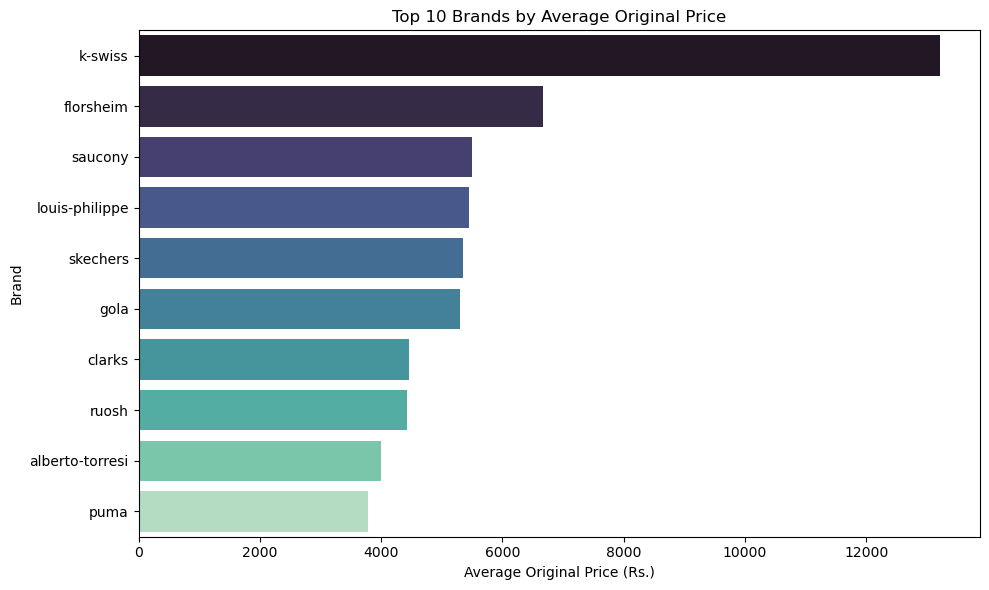

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select top 10 brands with the highest average price
top10_avg_price_brands = average_price_by_brand.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_avg_price_brands.values, y=top10_avg_price_brands.index, palette="mako")
plt.title("Top 10 Brands by Average Original Price")
plt.xlabel("Average Original Price (Rs.)")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

### 📊 Insight:
#### This analysis helps identify premium brands based on their original pricing. Brands at the top of this list are likely positioned as luxury or high-end, while those at the bottom cater to more budget-conscious segments. 

#### 🔍 Top Performing Brands Across Price Tiers

In [34]:
avg_price_by_tier_brand = df.groupby(["Price_Tier", "Brand"])["Original_Price"].mean().reset_index()

# Get the brand with the highest average price in each tier
top_brand_per_tier = avg_price_by_tier_brand.sort_values("Original_Price", ascending=False).groupby("Price_Tier").first().reset_index()

# Display result
print(top_brand_per_tier)

        Price_Tier           Brand  Original_Price
0           Luxury         k-swiss    13213.285714
1  budget friendly           umbro      499.000000
2          premium  louis-philippe     3999.000000
3       reasonable  rugged-outback     1999.000000


### 📊 Insight:
#### This analysis reveals which brands dominate each pricing segment.
#### This helps retailers understand brand positioning and helps consumers identify which brands offer products in their preferred price range.

### 🔍 Top 10 Premium Brands by Highest Priced Products

In [35]:
# Group by brand and get max price
brand_max_prices = df.groupby("Brand")["Original_Price"].max().reset_index()

# Sort and get top 10 brands
top10_expensive_brands = brand_max_prices.sort_values(by="Original_Price", ascending=False).head(10)

# Display result
print("Top 10 Brands by Highest Priced Product:")
print(top10_expensive_brands)

🔝 Top 10 Brands by Highest Priced Product:
              Brand  Original_Price
185               w         19999.0
100         k-swiss         14999.0
26             biba         13950.0
37           clarks         10999.0
94     john-players          8999.0
170         swadesh          8999.0
109  louis-philippe          7499.0
16          aurelia          6999.0
63        florsheim          6995.0
146            puma          6499.0


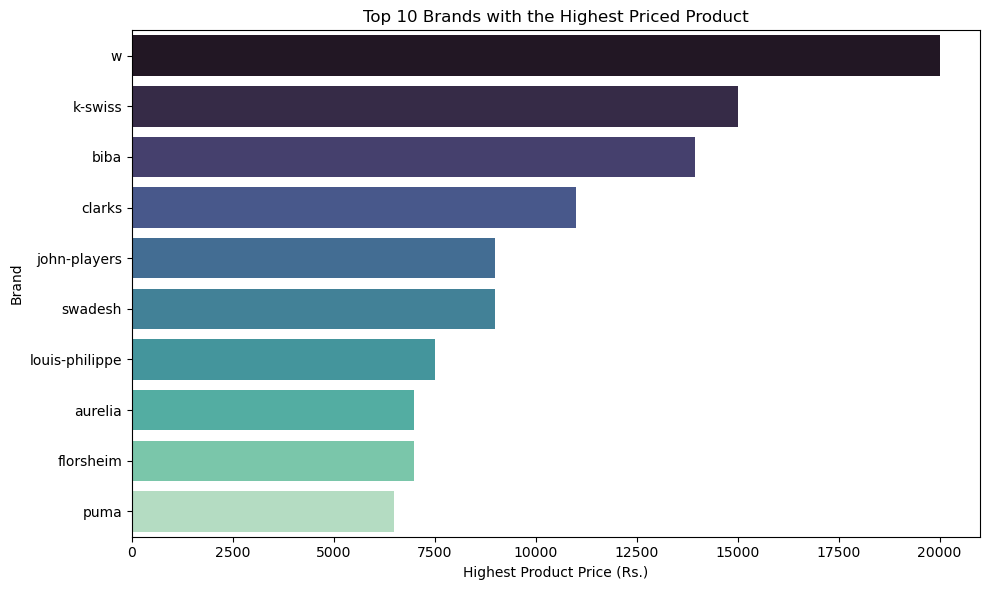

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_expensive_brands, x="Original_Price", y="Brand", palette="mako")
plt.title("Top 10 Brands with the Highest Priced Product")
plt.xlabel("Highest Product Price (Rs.)")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

### 📊 Insight:
#### This analysis highlights which brands offer the most expensive individual products.
#### Brands at the top are likely premium or luxury fashion houses, targeting high-income consumers.
#### These brands may not dominate in volume but stand out for their high-ticket items, which can be important for branding, exclusivity, or profitability.

###  Top 10 Women's Brands by Highest Original Pricing

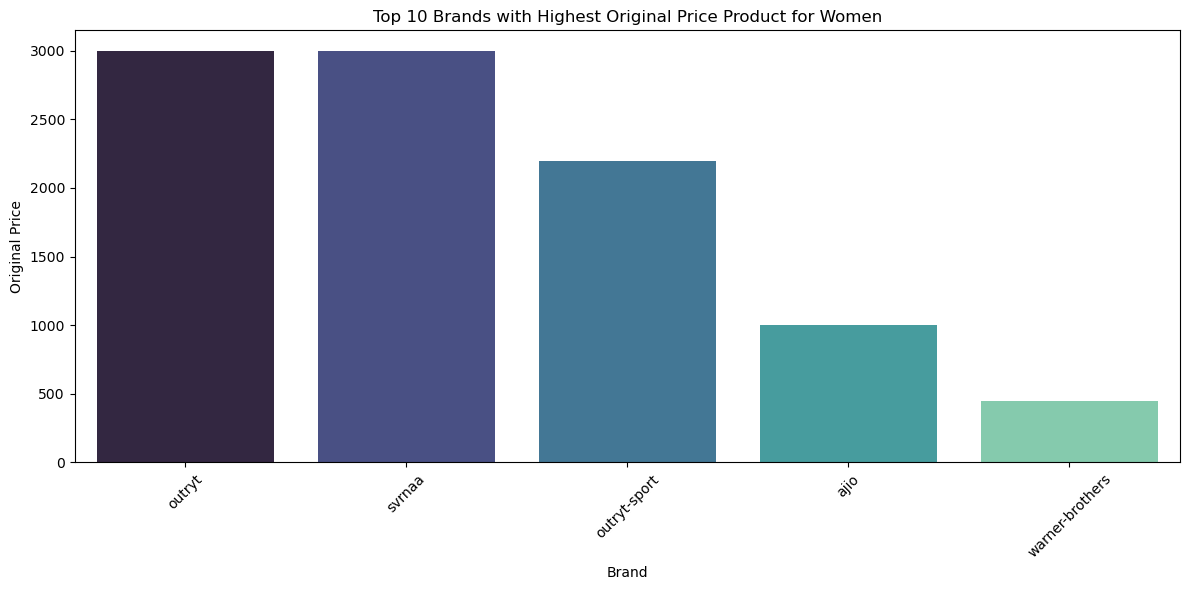

In [37]:
# Filter for women's products
women_df = df[df["Description"].str.contains("women", case=False, na=False)]

# Get the highest original price product for each brand
brand_top_prices = women_df.groupby("Brand")["Original_Price"].max().sort_values(ascending=False).head(10).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Brand", y="Original_Price", data=brand_top_prices, palette="mako")
plt.title("Top 10 Brands with Highest Original Price Product for Women")
plt.ylabel("Original Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### This reveals which brands are offering the most expensive women’s products.
#### Brands at the top are likely targeting the premium or luxury women's segment, offering high-end fashion or exclusive collections.
#### Useful for:
#### Retailers who want to position high-value items to women buyers.
#### Consumers looking for top-tier fashion brands in the women's segment.

### Top 15 Highest Priced Products

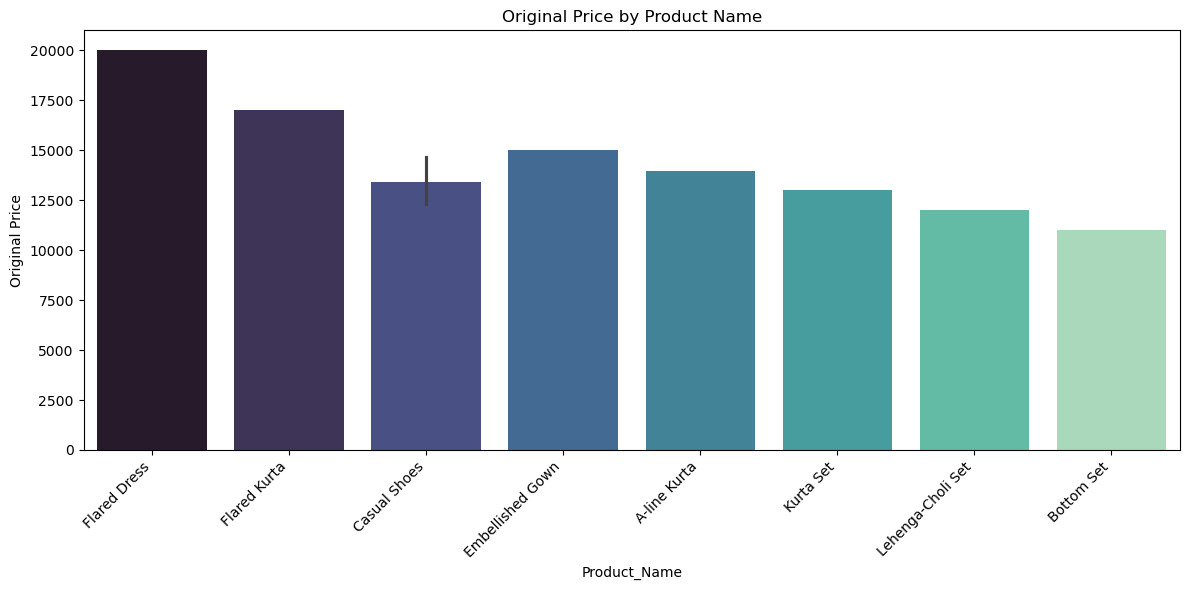

In [38]:
# Sort by price and select top 15 for better visualization
top_products = df.sort_values("Original_Price", ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Product_Name",
    y="Original_Price",
    data=top_products,
    palette="mako"
)
plt.title("Original Price by Product Name")
plt.ylabel("Original Price")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### These products represent the most premium items in the dataset. They often belong to exclusive designer collections, limited editions, or special categories like luxury sarees, bridal wear, or leather jackets.
#### Many of these high-priced items are from brands that focus on status, craftsmanship, and exclusivity, not mass production.
#### These products may not sell in large quantities but are expected to yield high margins per unit.

### Products Categorized Under the 'Reasonable' Price Tier

In [39]:
# Filter products in the "Reasonable" price tier
reasonable_products = df[df["Price_Tier"] == "reasonable"]

# Get list of unique product names in that tier
product_list = reasonable_products["Product_Name"].dropna().unique().tolist()

# Display or use the list
print("Product Names in 'Reasonable' Price Tier:")
for name in product_list:
    print(name)

Product Names in 'Reasonable' Price Tier:
Track Pants
Sports Shoes
Crew-Neck T-shirt
Print Joggers
Rib Joggers
charcoal xs
Joggers
Flat-Front Shorts
Print Shorts
Straight Trackpants
Coordinate Joggers
Windbreaker Jacket
Polo T-shirt
Heathered Joggers
Quick-Dry Shorts
Colourblock Shorts
Hybrid Jacket
Hooded Jacket
Fit Joggers
Bermuda Shorts
Thong-Strap Sandals
Heathered Bermuda
Cuffed Joggers
Running Shorts
Round-Neck T-shirt
Hybrid Joggers
Shorts
Mid-Rise Joggers
Woven Shorts
Bermuda
Walking Shoes
Colourblock Bermudas
Training T-shirt
Printed Trackpants
Running Shoes
Heathered Trackpants
Panelled Joggers
Casual Sandals
Knit Shorts
Trackpants
Fitted Trackpants
-On Flip-Flops
Print Sliders
Sew Joggers
Thong-Strap Slippers
Mid-Rise Trackpants
Bermudas Shorts
Striped Shorts
Jogger Pant
City Shorts
Round-Neck Sweatshirt
Textured Shorts
Flat Sandals
Performance Shoes
Track Jacket
Thong-Strap Flip-Flops
Double-Strap Sandals
Jacquard T-shirt
Washable Sandals
Lace-Up Shoes
Lifestyle Shoes
Casua

#### These products are likely targeted at the average consumer segment.
#### They strike a balance between affordability and style, often used for daily wear or functional fashion.
#### Reasonably priced products typically rely on high sales volume rather than large per-unit profits.

## Discount strategy analysis

### Brand-Wise Average Discount Analysis

In [40]:
avg_discount_by_brand = df.groupby("Brand")["Discount_Percentage"].mean().sort_values(ascending=False)

# Display result
print("Average Discount Percentage by Brand:")
print(avg_discount_by_brand)

Average Discount Percentage by Brand:
Brand
jp-jeans            74.980000
trends              74.978000
avaasa-workwear     74.970000
swadesh             71.953684
lee-cooper-women    70.545000
                      ...    
integriti            0.000000
indigo-nation        0.000000
inblu                0.000000
id                   0.000000
zaxy                 0.000000
Name: Discount_Percentage, Length: 191, dtype: float64


#### Brands offering the highest average discounts are likely focusing on market penetration, clearing inventory, or price-based competition.
#### They may rely on frequent promotions or participate heavily in sales events (e.g., Big Billion Day, End-of-Season Sales).

#### Product Distribution Across Discount Tiers with Visual Insights

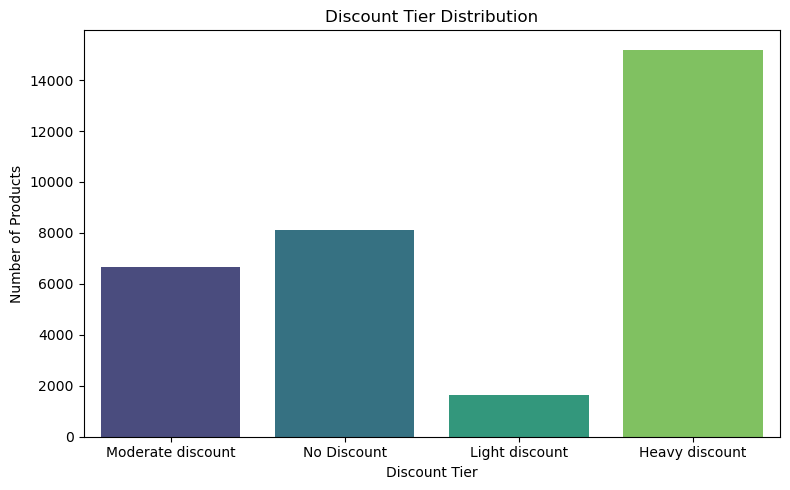

In [41]:
# Plot discount tier distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Discount_Tier", data=df, palette="viridis")
plt.title("Discount Tier Distribution")
plt.xlabel("Discount Tier")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()


#### A large portion of products fall into the heavy discount tier, indicating this is the preferred range for promotional pricing — enough to entice buyers while preserving brand value.
#### Very few products fall into the light discount tier, typically reserved for clearance, end-of-season sales, or low-performing inventory that brands aim to move quickly.

### Category-Wise Discount Analysis

In [42]:
# Average discount by category
avg_discount_by_category = df.groupby("Category")["Discount_Percentage"].mean().sort_values(ascending=False)

# Display result
print("Average Discount Percentage by Category:")
print(avg_discount_by_category)

Average Discount Percentage by Category:
Category
Westernwear    39.270468
Topwear        37.817540
Fusionwear     36.369258
Bottomwear     36.136394
Ethnicwear     33.613717
Activewear     30.464794
Lingerie       23.462677
Footwear       19.518580
Innerwear       4.835521
Name: Discount_Percentage, dtype: float64


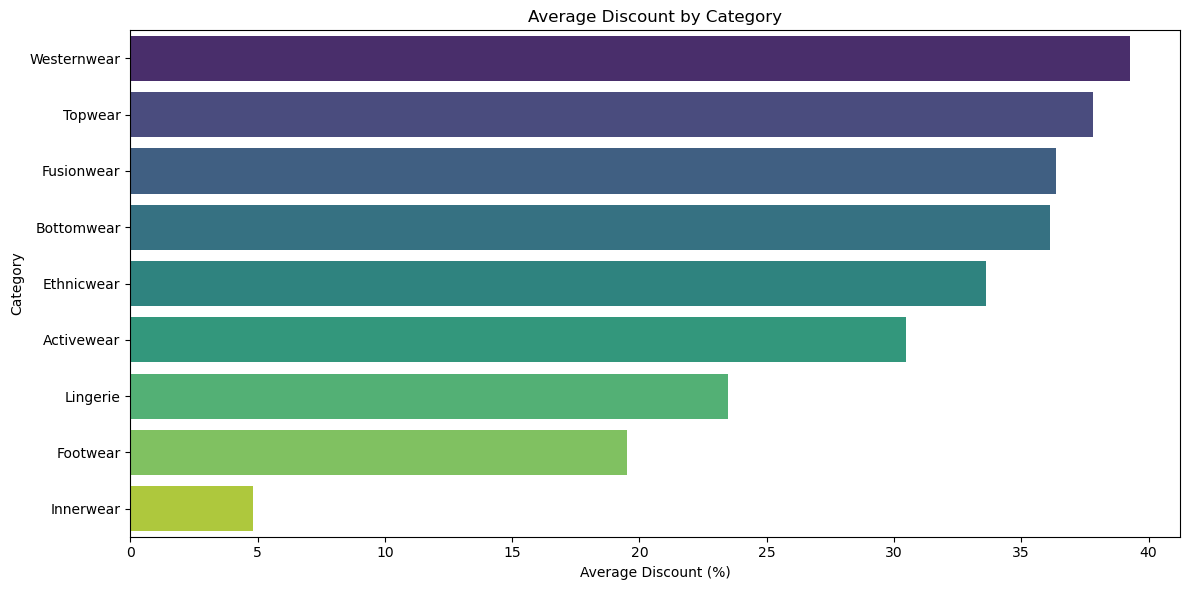

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_discount_by_category.values, y=avg_discount_by_category.index, palette="viridis")
plt.title("Average Discount by Category")
plt.xlabel("Average Discount (%)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

#### Westernwear Receives the Highest Discounts (~39%) is a highly competitive or seasonal category, with frequent promotions likely used to drive sales and manage inventory turnover.
#### Topwear, Fusionwear, and Bottomwear Follow Closely (~36–38%) aggressive discounting, indicating fast-moving fashion segments with constant style updates and possibly high stock rotation.

### Comparative Discount Trends by Gender

In [93]:
# Average discount by gender
avg_discount_by_gender = df.groupby("Category_by_gender")["Discount_Percentage"].mean().sort_values(ascending=False)

# Display result
print("Average Discount Percentage by Gender:")
print(avg_discount_by_gender)


Average Discount Percentage by Gender:
Category_by_gender
Men      33.31903
Women    32.69499
Name: Discount_Percentage, dtype: float64


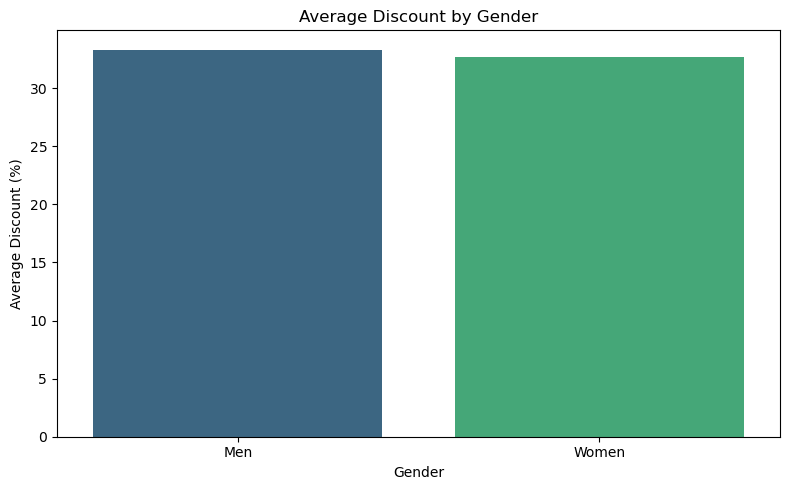

In [96]:
#Convert Series to DataFrame if needed
avg_discount_df = avg_discount_by_gender.reset_index()
avg_discount_df.columns = ["Gender", "Average_Discount"]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_discount_df, x="Gender", y="Average_Discount", palette="viridis")
plt.title("Average Discount by Gender")
plt.ylabel("Average Discount (%)")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()

#### The average discount for men's products is marginally higher than for women’s. This indicates that brands may be using more aggressive discounting to incentivize purchases in the men’s segment, which often sees slower style turnover or lower purchase frequency.
#### Although women’s fashion is highly competitive and fast-moving, the discount percentage is slightly lower, possibly due to higher regular pricing or better perceived value, allowing brands to retain more margin

### Top 10 Brands Offering the Highest Average Discounts

In [46]:
top_discount_brands = df.groupby("Brand")["Discount_Percentage"].mean().sort_values(ascending=False).head(10)

# Display the result
print("Top 10 Brands with Highest Average Discount:")
print(top_discount_brands)

Top 10 Brands with Highest Average Discount:
Brand
jp-jeans            74.980000
trends              74.978000
avaasa-workwear     74.970000
swadesh             71.953684
lee-cooper-women    70.545000
outryt              70.245439
gola                69.990000
saucony             69.990000
altheory            69.980377
svrnaa              69.980071
Name: Discount_Percentage, dtype: float64


#### Many top-discounting brands are often fast-fashion, entry-level, or off-price retailers, where high turnover and frequent sales cycles demand continual discounting.

### Top 10 Products with the Highest Discounts

In [47]:
# Get top 10 most discounted products
top_discounted_products = df.sort_values(by="Discount_Percentage", ascending=False).head(10)

# Display selected columns
print(top_discounted_products[["Product_Name", "Original_Price", "Discount_Price", "Discount_Percentage"]])

            Product_Name  Original_Price  Discount_Price  Discount_Percentage
21728      Slip-On Boots          3995.0           599.0                85.01
21652       Casual Shoes          3195.0           511.0                84.01
17334       A-line Kurta          7999.0          1600.0                80.00
21073         Boat Shoes          2795.0           559.0                80.00
21063         Boat Shoes          2995.0           599.0                80.00
24306       A-line Tunic          6899.0          1380.0                80.00
17557  Brocade Angarakha          7599.0          1520.0                80.00
24026      Brocade Tunic          6899.0          1380.0                80.00
19723       Flared Kurta          8599.0          1720.0                80.00
6393        Casual Shoes          3995.0           799.0                80.00


#### These products likely feature deep markdowns, indicating clearance sales, end-of-season stock, or products with low demand or obsolete styles.

### Gender-Based Discount Comparison for Top 10 Brands

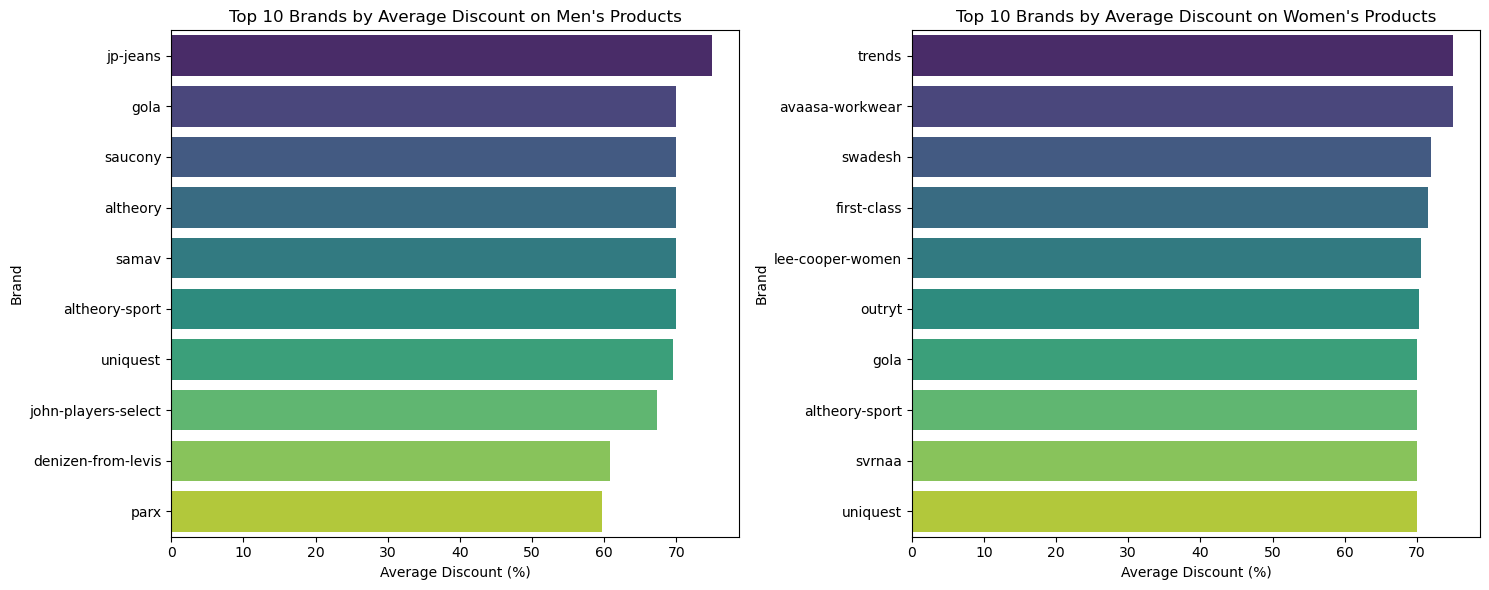

In [48]:
# Filter for men's products
men_df = df[df["Category_by_gender"].str.lower() == "men"]


# Get top 10 brands with highest average discount
top_men_discount_brands = (men_df.groupby("Brand")["Discount_Percentage"].mean().sort_values(ascending=False).head(10))

women_df = df[df["Category_by_gender"].str.lower() == "women"]


# Get top 10 brands with highest average discount
top_women_discount_brands = (women_df.groupby("Brand")["Discount_Percentage"].mean().sort_values(ascending=False).head(10))

# Plot

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=top_men_discount_brands.values, y=top_men_discount_brands.index, palette="viridis")
plt.title("Top 10 Brands by Average Discount on Men's Products")
plt.xlabel("Average Discount (%)")
plt.ylabel("Brand")

plt.subplot(1, 2, 2)
sns.barplot(x=top_women_discount_brands.values, y=top_women_discount_brands.index, palette="viridis")
plt.title("Top 10 Brands by Average Discount on Women's Products")
plt.xlabel("Average Discount (%)")
plt.ylabel("Brand")

plt.tight_layout()
plt.show()

#### Only 3 brands—Gola, Altheory-Sport, and Uniquest—appear in both charts, suggesting that most brands focus their discount strategies toward a specific gender segment.
#### Top discounting brands for women—Trends, Avaasa-Workwear, Swadesh—don’t appear in the men's list, indicating a segmented pricing strategy catering to women-focused markets.

#### Top 15 Most Heavily Discounted Products

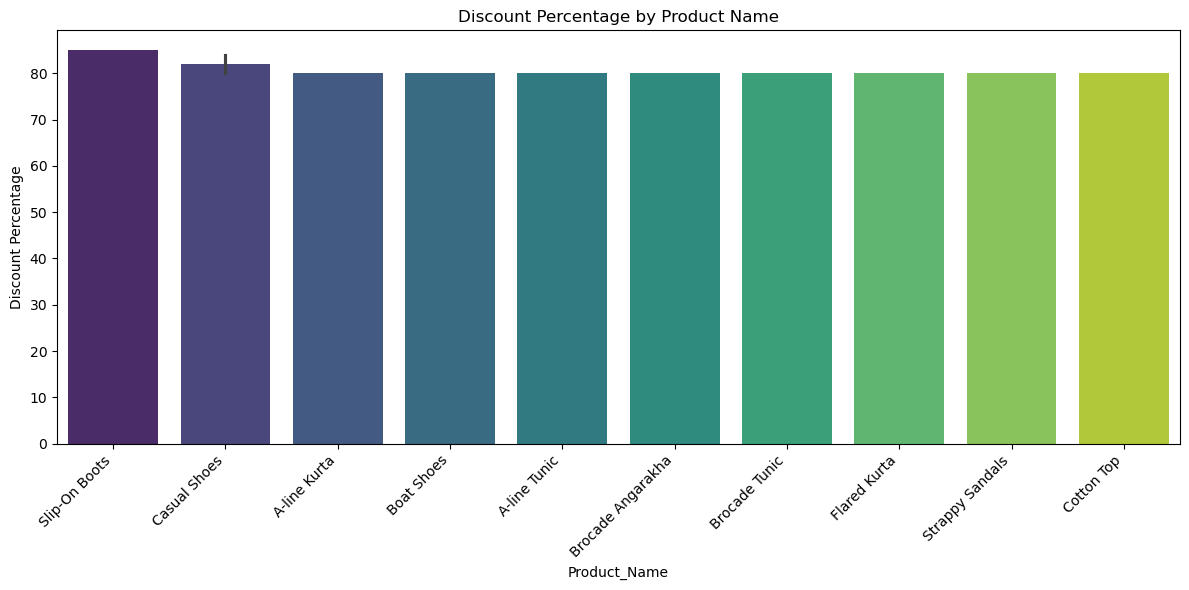

In [49]:
# Sort by price and select top 15 for better visualization
top_products = df.sort_values("Discount_Percentage", ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))

sns.barplot(x="Product_Name",y="Discount_Percentage",data=top_products,palette="viridis")
plt.title("Discount Percentage by Product Name")
plt.ylabel("Discount Percentage")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### High Discount Cluster: All top 10 products are tightly clustered around an 80% discount, indicating aggressive markdowns likely meant for inventory clearance or to boost sales volume.
#### Items like A-line Kurta, Brocade Angrakha, Brocade Tunic, and Flared Kurta reflect a strong representation of ethnic/casual wear being discounted at deep rates, potentially signaling slow-moving inventory in this category.   

## Gender Focus trend analysis

#### which gender has most product offering

In [50]:
product_count_by_gender = df['Category_by_gender'].value_counts().reset_index()
product_count_by_gender.columns = ['Category_by_gender', 'Product_Count']

# Display result
print("Product Count by Gender:")
print(product_count_by_gender)

Product Count by Gender:
  Category_by_gender  Product_Count
0              Women          17207
1                Men          14375


#### gender receives the most discounted on average

In [51]:
avg_discount_by_gender = df.groupby("Category_by_gender")["Discount_Percentage"].mean().reset_index().sort_values(by="Discount_Percentage", ascending=False)

# Display results
print("Average Discount Percentage by Gender:")
print(avg_discount_by_gender)

Average Discount Percentage by Gender:
  Category_by_gender  Discount_Percentage
0                Men             33.31903
1              Women             32.69499


#### Which category dominate each gender segment

In [52]:
# Count number of products by Gender and Category
gender_category_counts = df.groupby(['Category_by_gender', 'Category']).size().reset_index(name='Product_Count')

# For each gender, find top 3 categories (change .head(3) to .head(5) for top 5)
top_categories_per_gender = (
    gender_category_counts
    .sort_values(['Category_by_gender', 'Product_Count'], ascending=[True, False])
    .groupby('Category_by_gender')
    .head(5)
)

print("Top Categories for Each Gender:")
print(top_categories_per_gender)

Top Categories for Each Gender:
   Category_by_gender     Category  Product_Count
4                 Men      Topwear           7110
2                 Men     Footwear           3015
1                 Men   Bottomwear           2984
0                 Men   Activewear           1170
3                 Men    Innerwear             96
10              Women  Westernwear           6641
6               Women   Ethnicwear           5265
7               Women     Footwear           3015
8               Women   Fusionwear            997
5               Women   Activewear            964


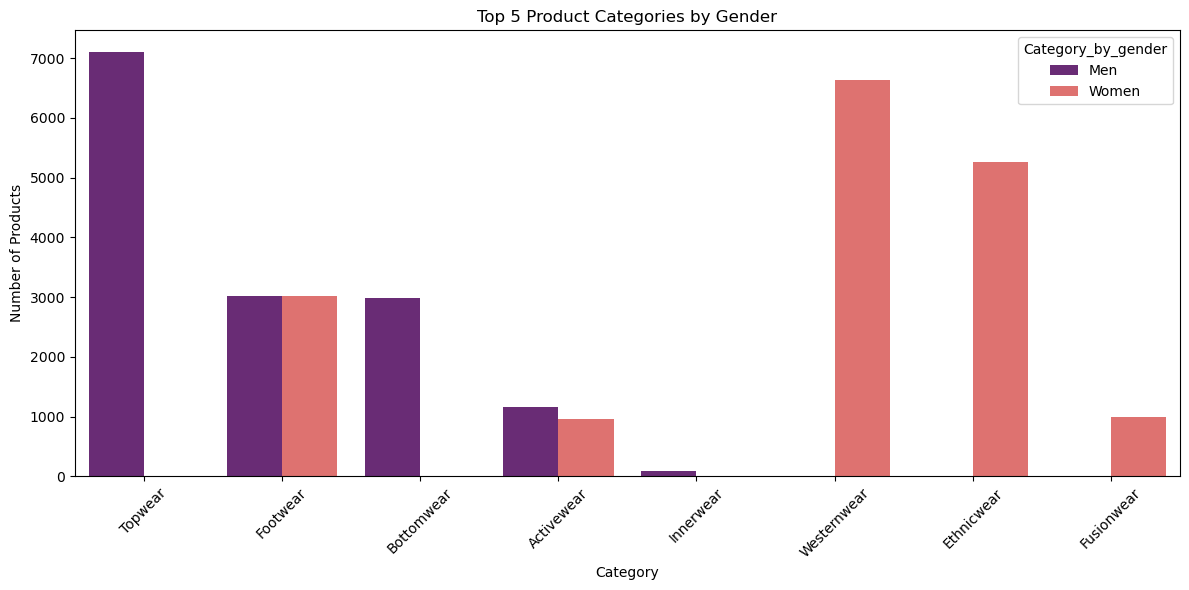

In [114]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_categories_per_gender, 
            x="Category", 
            y="Product_Count", 
            hue="Category_by_gender", 
            palette="magma")

plt.title("Top 5 Product Categories by Gender")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### how many unique brand each gender is buying

In [53]:
unique_brands_per_gender = df.groupby("Category_by_gender")["Brand"].nunique().reset_index()
unique_brands_per_gender.columns = ["Category_by_gender", "Unique_Brand_Count"]

# Display result
print("Number of Unique Brands Each Gender is Buying:")
print(unique_brands_per_gender)

Number of Unique Brands Each Gender is Buying:
  Category_by_gender  Unique_Brand_Count
0                Men                  96
1              Women                 118


#### average price range by gender

In [54]:
avg_price_by_gender = df.groupby("Category_by_gender")["Original_Price"].mean().reset_index()
avg_price_by_gender.columns = ["Category_by_gender", "Average_Original_Price"]

# Round values
avg_price_by_gender["Average_Original_Price"] = avg_price_by_gender["Average_Original_Price"].round(2)

# Display result
print("Average Original Price by Gender:")
print(avg_price_by_gender)

Average Original Price by Gender:
  Category_by_gender  Average_Original_Price
0                Men                 1459.13
1              Women                 1383.82


#### comparesion between top 10 brand having highest original price as per each gender @

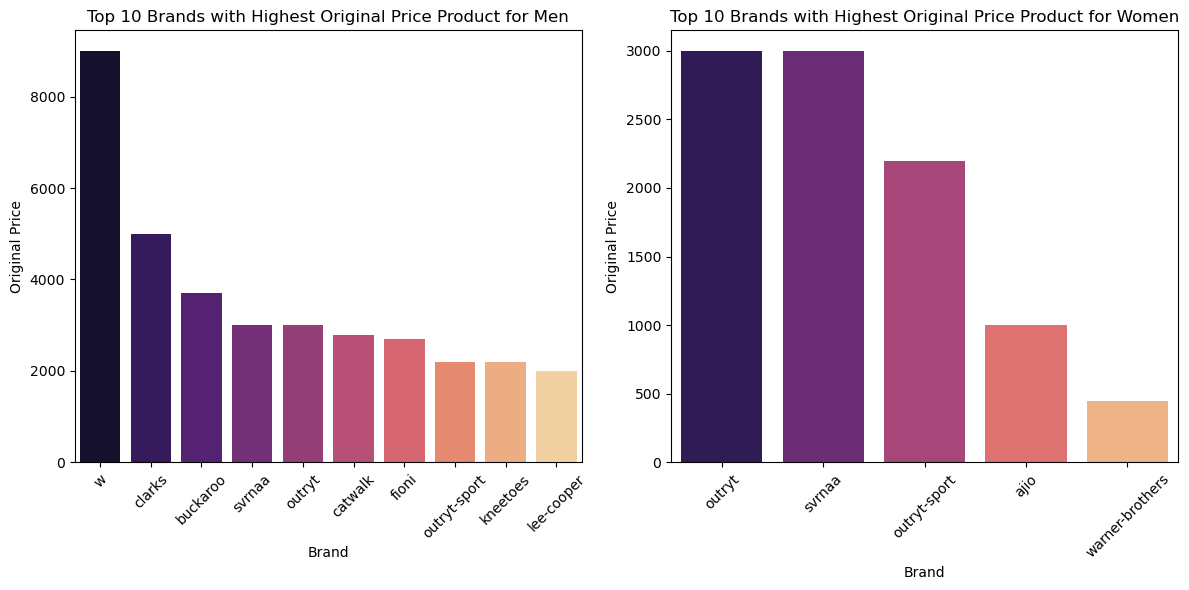

In [55]:
# Filter for men's products
men_df = df[df["Description"].str.contains("men", case=False, na=False)]

# Get the highest original price product for each brand
brand_top_prices_men = men_df.groupby("Brand")["Original_Price"].max().sort_values(ascending=False).head(10).reset_index()

# Filter for women's products
women_df = df[df["Description"].str.contains("women", case=False, na=False)]

# Get the highest original price product for each brand
brand_top_prices_women = women_df.groupby("Brand")["Original_Price"].max().sort_values(ascending=False).head(10).reset_index()


# Plot

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x="Brand", y="Original_Price", data=brand_top_prices_men, palette="magma")
plt.title("Top 10 Brands with Highest Original Price Product for Men")
plt.ylabel("Original Price")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x="Brand", y="Original_Price", data=brand_top_prices_women, palette="magma")
plt.title("Top 10 Brands with Highest Original Price Product for Women")
plt.ylabel("Original Price")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### top 10 brand giving max avg discount for men through visualisation @

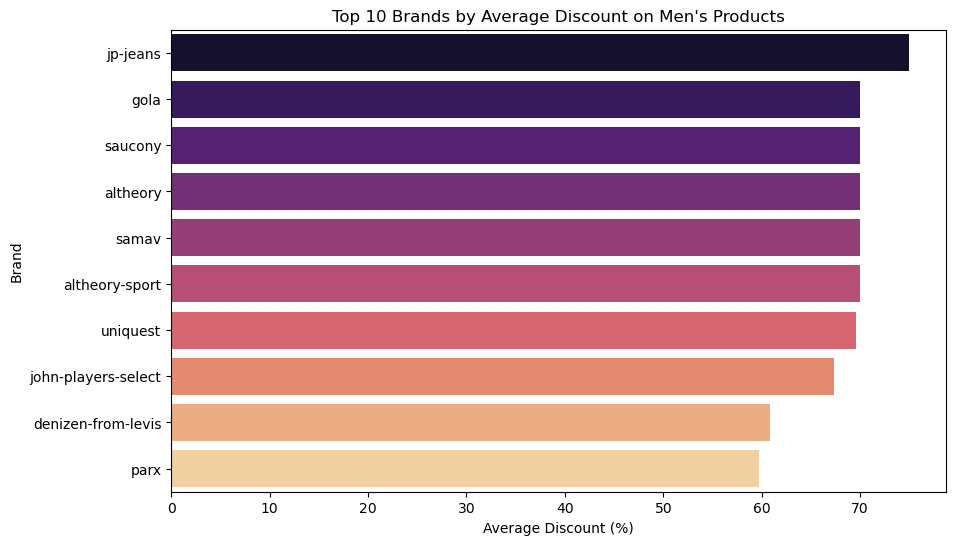

In [56]:
# Filter for men's products
men_df = df[df["Category_by_gender"].str.lower() == "men"]


# Get top 10 brands with highest average discount
top_men_discount_brands = (men_df.groupby("Brand")["Discount_Percentage"].mean().sort_values(ascending=False).head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=top_men_discount_brands.values, y=top_men_discount_brands.index, palette="magma")
plt.title("Top 10 Brands by Average Discount on Men's Products")
plt.xlabel("Average Discount (%)")
plt.ylabel("Brand")
plt.show()

#### list of top 5 category giving max discount as per perticular gender @

In [57]:
men_df = df[df["Category_by_gender"].str.lower() == "men"]

# Group by category and calculate average discount
avg_discount_by_category_men= men_df.groupby("Category")["Discount_Percentage"].mean().reset_index()

# Sort and get top 10
top_5_discount_categories_men = avg_discount_by_category_men.sort_values(by="Discount_Percentage", ascending=False).head(5)

# Display result
print("Top 5 Categories with Max Discount on Men's Products:")
print(top_5_discount_categories_men)

women_df = df[df["Category_by_gender"].str.lower() == "women"]

# Group by category and calculate average discount
avg_discount_by_category_women = women_df.groupby("Category")["Discount_Percentage"].mean().reset_index()

# Sort and get top 10
top_5_discount_categories_women = avg_discount_by_category_women.sort_values(by="Discount_Percentage", ascending=False).head(5)

# Display result
print("Top 5 Categories with Max Discount on Women's Products:")
print(top_5_discount_categories_women)

Top 5 Categories with Max Discount on Men's Products:
     Category  Discount_Percentage
4     Topwear            37.817540
1  Bottomwear            36.136394
0  Activewear            29.249675
2    Footwear            22.408299
3   Innerwear             4.835521
Top 5 Categories with Max Discount on Women's Products:
      Category  Discount_Percentage
5  Westernwear            39.270468
3   Fusionwear            36.369258
1   Ethnicwear            33.613717
0   Activewear            31.939575
4     Lingerie            23.462677


#### comperasion between men and women through category which gives max discount as per gender@

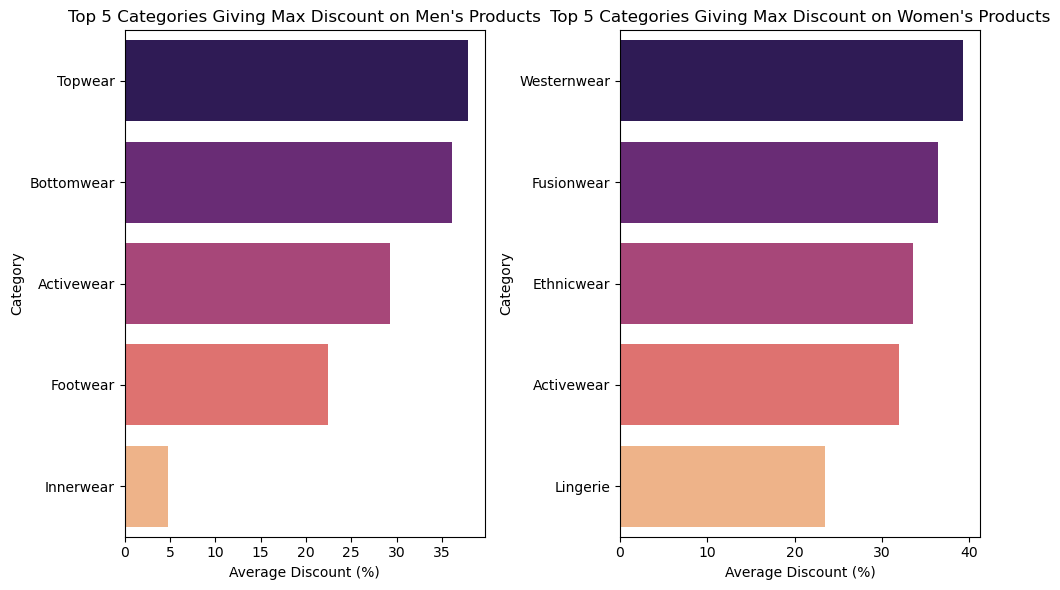

In [58]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=top_5_discount_categories_men,x="Discount_Percentage",y="Category",palette="magma")
plt.title("Top 5 Categories Giving Max Discount on Men's Products")
plt.xlabel("Average Discount (%)")
plt.ylabel("Category")


plt.subplot(1, 2, 2)
sns.barplot(data=top_5_discount_categories_women,
x="Discount_Percentage",y="Category",palette="magma")
plt.title("Top 5 Categories Giving Max Discount on Women's Products")
plt.xlabel("Average Discount (%)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


### Brand level strategy profile

#### Average discount per brand

In [59]:
avg_discount_per_brand = df.groupby("Brand")["Discount_Percentage"].mean().sort_values(ascending=False)

# Display result
print("Average Discount Percent per Brand:")
print(avg_discount_per_brand)

Average Discount Percent per Brand:
Brand
jp-jeans            74.980000
trends              74.978000
avaasa-workwear     74.970000
swadesh             71.953684
lee-cooper-women    70.545000
                      ...    
integriti            0.000000
indigo-nation        0.000000
inblu                0.000000
id                   0.000000
zaxy                 0.000000
Name: Discount_Percentage, Length: 191, dtype: float64


#### top 10 most discounted brand overall

In [60]:
top_brand_discounts = (
    df.groupby("Brand")["Discount_Percentage"].mean().sort_values(ascending=False).head(10)
)

# Display result
print("Top 10 Brands with Highest Average Discount:")
print(top_brand_discounts)

Top 10 Brands with Highest Average Discount:
Brand
jp-jeans            74.980000
trends              74.978000
avaasa-workwear     74.970000
swadesh             71.953684
lee-cooper-women    70.545000
outryt              70.245439
gola                69.990000
saucony             69.990000
altheory            69.980377
svrnaa              69.980071
Name: Discount_Percentage, dtype: float64


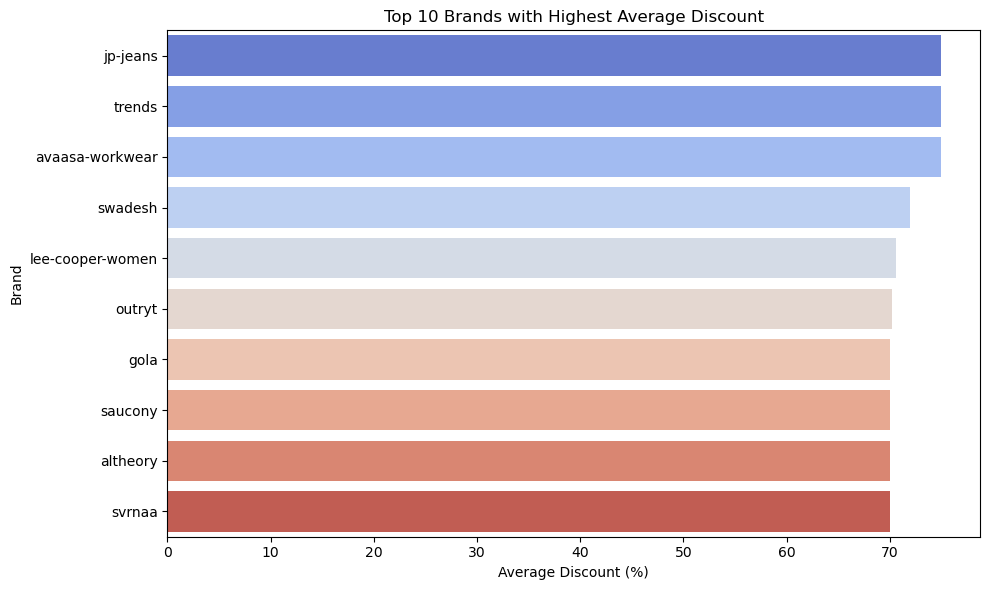

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brand_discounts.values, y=top_brand_discounts.index, palette="coolwarm")
plt.xlabel("Average Discount (%)")
plt.title("Top 10 Brands with Highest Average Discount")
plt.tight_layout()
plt.show()

#### number of unique products listed under each brand

In [62]:
brands_by_products = df.groupby("Brand")["Product_Name"].nunique().sort_values(ascending=False)

# Display the result
print("Brands by Number of Unique Product Names:")
print(brands_by_products)

Brands by Number of Unique Product Names:
Brand
dnmx                     245
fig                      209
teamspirit               181
lee-cooper               161
ajio                     154
                        ... 
k-swiss                    1
chromozome                 1
srm-fashion                1
flying-machine-womens      1
dmi                        1
Name: Product_Name, Length: 191, dtype: int64


#### which category is getting more discount in brand @

In [63]:
# Group by Brand and Category to get average discount
discount_by_brand_category = df.groupby(["Brand", "Category"])["Discount_Percentage"].mean().reset_index()

# Sort values by discount
discount_by_brand_category_sorted = discount_by_brand_category.sort_values(by="Discount_Percentage", ascending=False)

print(discount_by_brand_category_sorted.head(10))  # Top 10 category-brand combos by discount

               Brand     Category  Discount_Percentage
109      first-class   Ethnicwear            74.980000
162         jp-jeans      Topwear            74.980000
288           trends  Westernwear            74.978750
287           trends   Fusionwear            74.978000
286           trends   Ethnicwear            74.975000
39   avaasa-workwear   Fusionwear            74.970000
102              fig   Fusionwear            74.067273
253              rio   Fusionwear            73.972000
278          swadesh   Fusionwear            72.386667
277          swadesh   Ethnicwear            71.938718


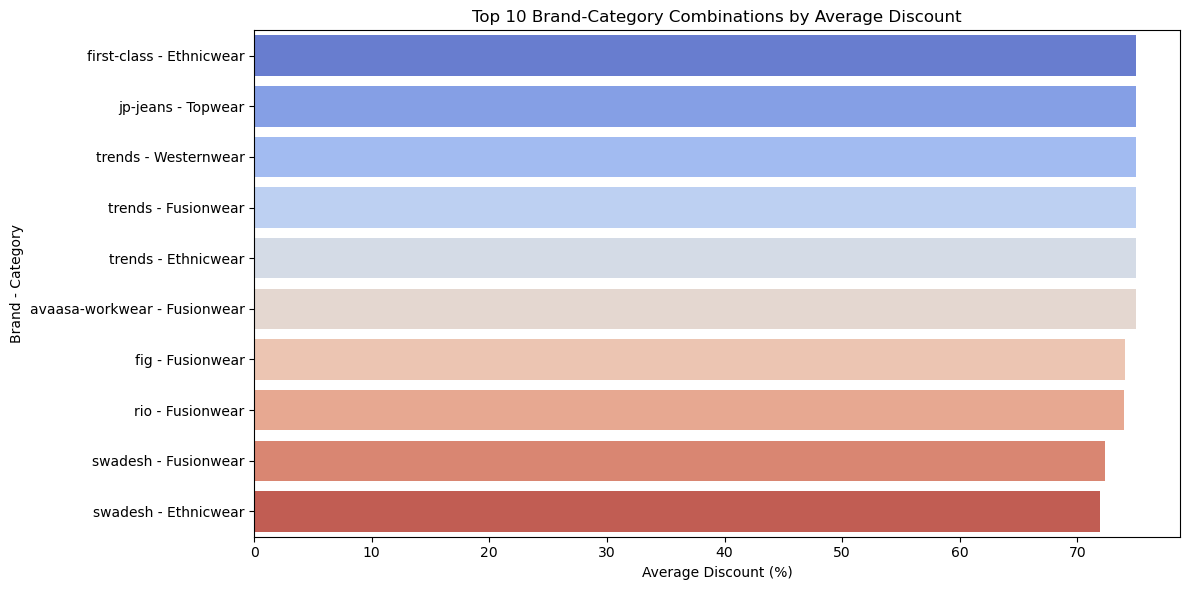

In [119]:
# Take top 10 combinations
top10 = discount_by_brand_category_sorted.head(10)

# Create a new column for label
top10["Label"] = top10["Brand"] + " - " + top10["Category"]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, y="Label", x="Discount_Percentage", palette="coolwarm")
plt.title("Top 10 Brand-Category Combinations by Average Discount")
plt.xlabel("Average Discount (%)")
plt.ylabel("Brand - Category")
plt.tight_layout()
plt.show()

#### List of brand with reasonable price tier and heavy discount

In [64]:
# Filter for desired criteria
filtered_df = df[(df["Price_Tier"] == "reasonable") & (df["Discount_Tier"] == "Heavy discount")]

# Get top 10 brands by count
top_10_brands = filtered_df["Brand"].value_counts().head(10)

# Show result
print("Top 10 Brands with Mid Price Tier and Aggressive Discount:")
print(top_10_brands)

Top 10 Brands with Mid Price Tier and Aggressive Discount:
Brand
performax             1402
john-players           940
avaasa-mix-n-match     778
ecko                   741
dnmx                   655
netplay                606
fig                    560
w                      523
john-players-jeans     485
teamspirit             463
Name: count, dtype: int64


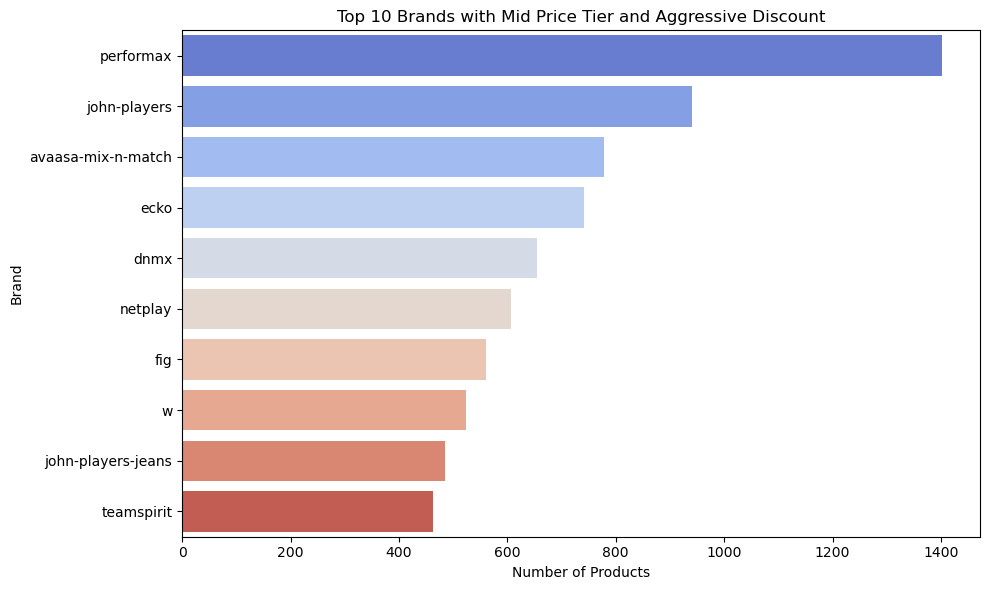

In [65]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_brands.values, y=top_10_brands.index, palette="coolwarm")
plt.title("Top 10 Brands with Mid Price Tier and Aggressive Discount")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

#### To find the top brands most used as per gender using product count (no of product of perticular brand as per gender)@

In [66]:
brand_usage_by_gender = df.groupby(['Category_by_gender', 'Brand']).size().reset_index(name='Product_Count')

# Get top 5 or 10 brands for each gender
top_brands_per_gender = (
    brand_usage_by_gender
    .sort_values(['Category_by_gender', 'Product_Count'], ascending=[True, False])
    .groupby('Category_by_gender')
    .head(10)
)

print(top_brands_per_gender)

    Category_by_gender               Brand  Product_Count
71                 Men           performax           1740
60                 Men             netplay           1698
46                 Men        john-players           1224
86                 Men          teamspirit           1028
24                 Men                dnmx            917
26                 Men                ecko            849
53                 Men          lee-cooper            722
47                 Men  john-players-jeans            664
12                 Men         christofano            525
82                 Men            schumann            516
107              Women  avaasa-mix-n-match           1507
184              Women           performax           1289
146              Women         hi-attitude           1191
211              Women                   w           1179
134              Women                 fig           1110
201              Women          teamspirit            880
105           

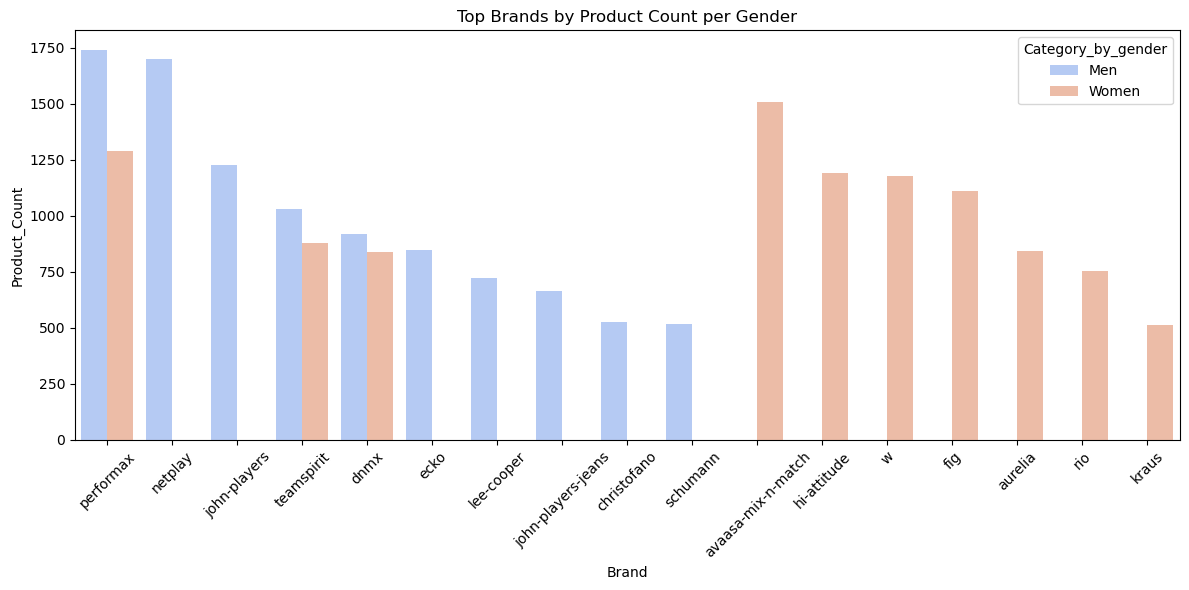

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_brands_per_gender, x='Brand', y='Product_Count', hue='Category_by_gender',palette="coolwarm")
plt.title("Top Brands by Product Count per Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### category deep analysis

#### total product by category

In [104]:
# Total products per category
category_counts = df["Category"].value_counts().reset_index()
category_counts.columns = ["Category", "Total_Products"]

# Display
print("Total Products by Category:")
print(category_counts)


Total Products by Category:
      Category  Total_Products
0      Topwear            7110
1  Westernwear            6641
2     Footwear            6030
3   Ethnicwear            5265
4   Bottomwear            2984
5   Activewear            2134
6   Fusionwear             997
7     Lingerie             325
8    Innerwear              96


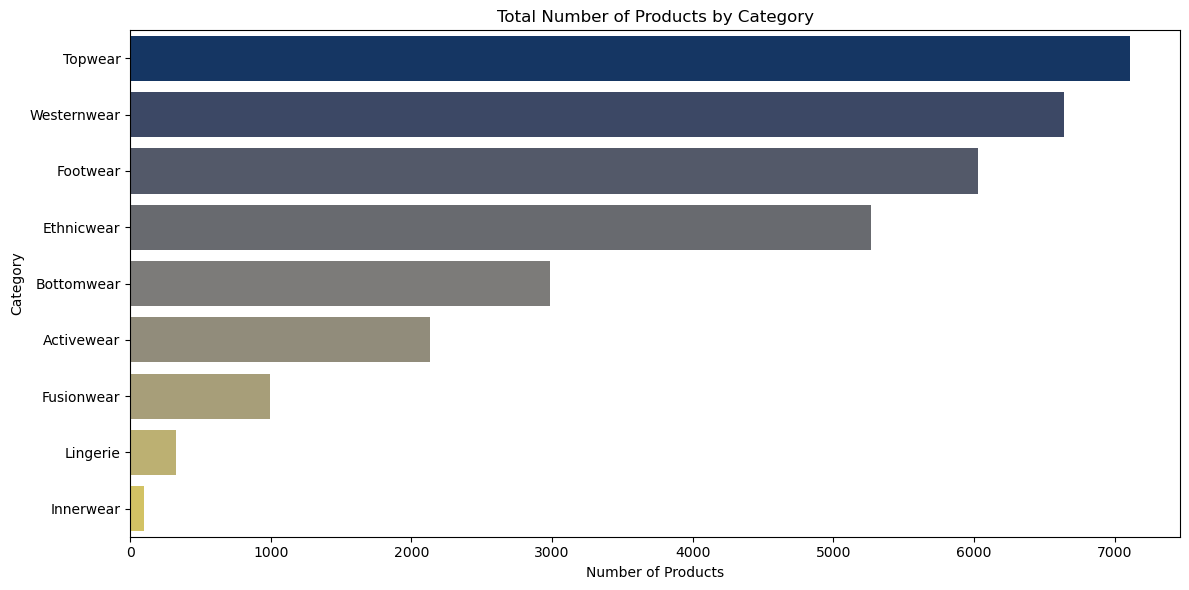

In [107]:
plt.figure(figsize=(12, 6))
sns.barplot(data=category_counts, x="Total_Products", y="Category", palette="cividis")
plt.title("Total Number of Products by Category")
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


#### average discount percentage by category

In [71]:
# Group by category and compute average discount
avg_discount_by_category = df.groupby("Category")["Discount_Percentage"].mean().reset_index()
avg_discount_by_category = avg_discount_by_category.sort_values(by="Discount_Percentage", ascending=False)

# Display result
print("Average Discount Percentage by Category:")
print(avg_discount_by_category)

Average Discount Percentage by Category:
      Category  Discount_Percentage
8  Westernwear            39.270468
7      Topwear            37.817540
4   Fusionwear            36.369258
1   Bottomwear            36.136394
2   Ethnicwear            33.613717
0   Activewear            30.464794
6     Lingerie            23.462677
3     Footwear            19.518580
5    Innerwear             4.835521


#### product count per gender and category

In [72]:
# Group by Gender and Category, then count products
product_counts = df.groupby(["Category_by_gender", "Category"]).size().reset_index(name="Product_Count")

# Display result
print("Product Count per Gender and Category:")
print(product_counts)

Product Count per Gender and Category:
   Category_by_gender     Category  Product_Count
0                 Men   Activewear           1170
1                 Men   Bottomwear           2984
2                 Men     Footwear           3015
3                 Men    Innerwear             96
4                 Men      Topwear           7110
5               Women   Activewear            964
6               Women   Ethnicwear           5265
7               Women     Footwear           3015
8               Women   Fusionwear            997
9               Women     Lingerie            325
10              Women  Westernwear           6641


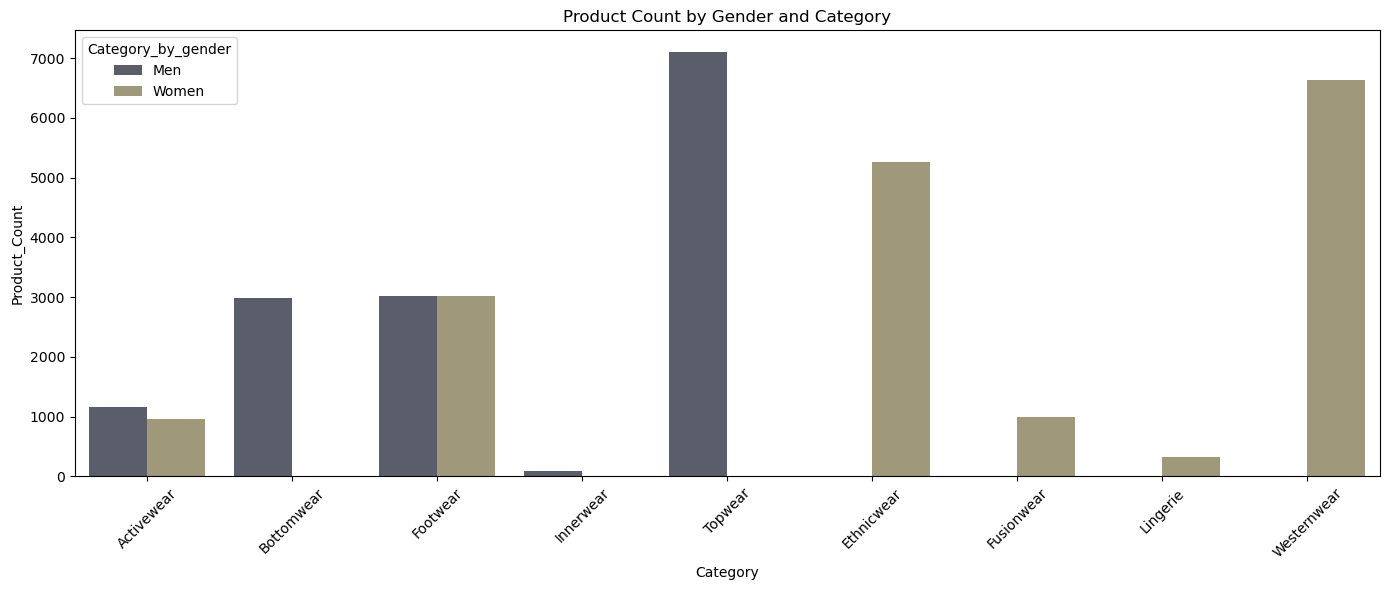

In [112]:
plt.figure(figsize=(14, 6))
sns.barplot(data=product_counts, x="Category", y="Product_Count", hue="Category_by_gender", palette="cividis")
plt.title("Product Count by Gender and Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### compare average of original and discounted price by category

In [74]:
#Group by Category and calculate average original and discounted price
avg_prices = df.groupby("Category")[["Original_Price", "Discount_Price"]].mean().reset_index()

# Round the values for better readability
avg_prices = avg_prices.round(2)

# Rename columns
avg_prices.columns = ["Category", "Avg_Original_Price", "Avg_Discounted_Price"]

# Display result
print("Average Original and Discounted Price by Category:")
print(avg_prices)

Average Original and Discounted Price by Category:
      Category  Avg_Original_Price  Avg_Discounted_Price
0   Activewear             1431.72                941.86
1   Bottomwear             1575.97                983.42
2   Ethnicwear             1673.94               1063.79
3     Footwear             1635.77               1265.80
4   Fusionwear             1877.25               1134.25
5    Innerwear              371.61                348.66
6     Lingerie              572.24                429.11
7      Topwear             1225.36                739.39
8  Westernwear             1136.23                696.39


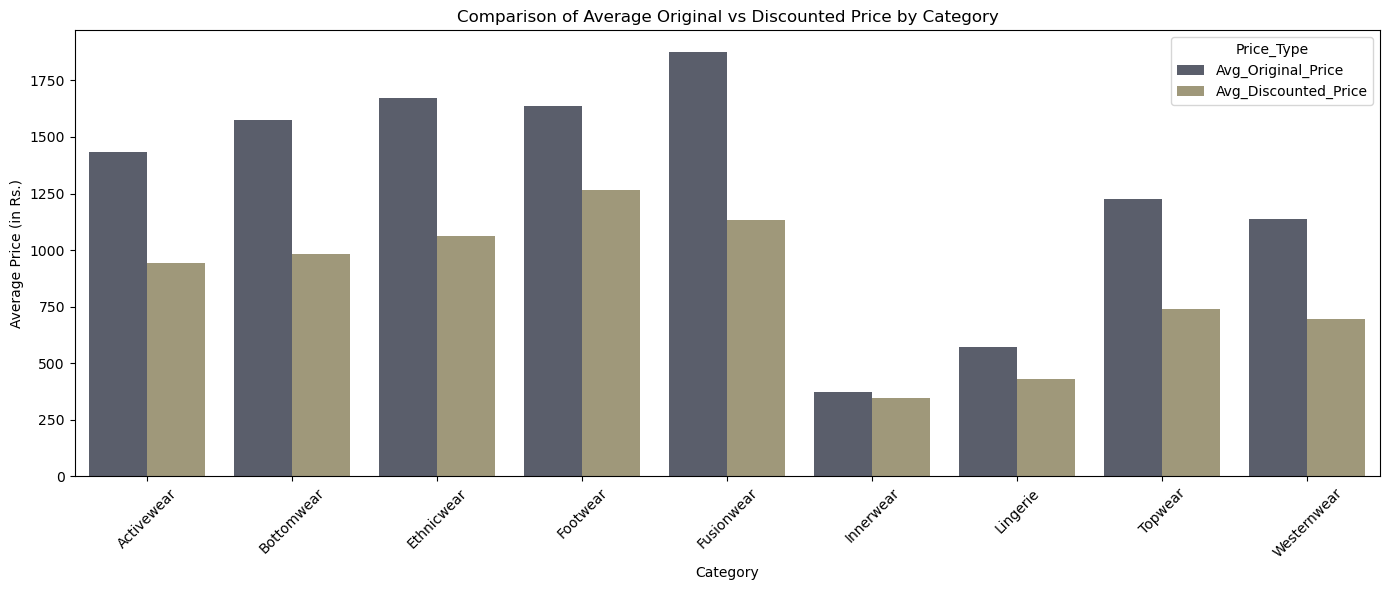

In [110]:
# Melt for comparison plot
avg_prices_melted = avg_prices.melt(id_vars="Category", 
                                     value_vars=["Avg_Original_Price", "Avg_Discounted_Price"],
                                     var_name="Price_Type", value_name="Price")

plt.figure(figsize=(14, 6))
sns.barplot(data=avg_prices_melted, x="Category", y="Price", hue="Price_Type", palette="cividis")
plt.title("Comparison of Average Original vs Discounted Price by Category")
plt.xlabel("Category")
plt.ylabel("Average Price (in Rs.)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### top 5 category of each price tier @

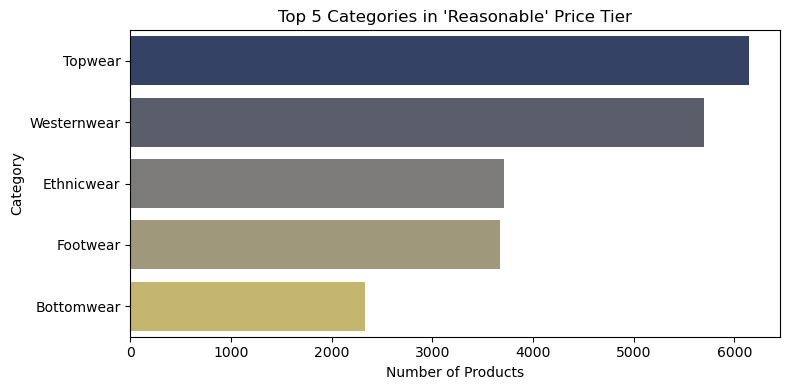

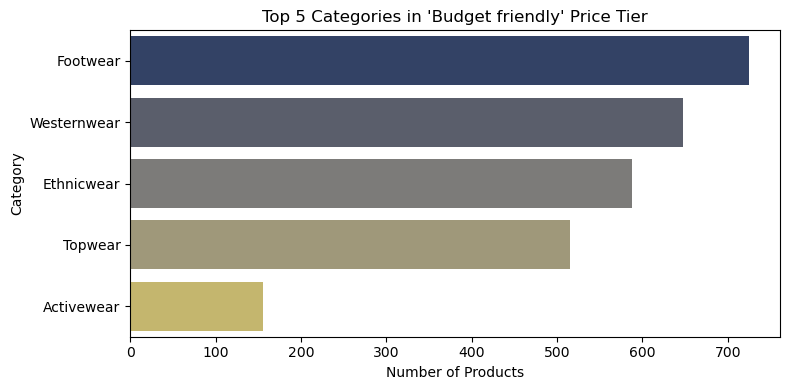

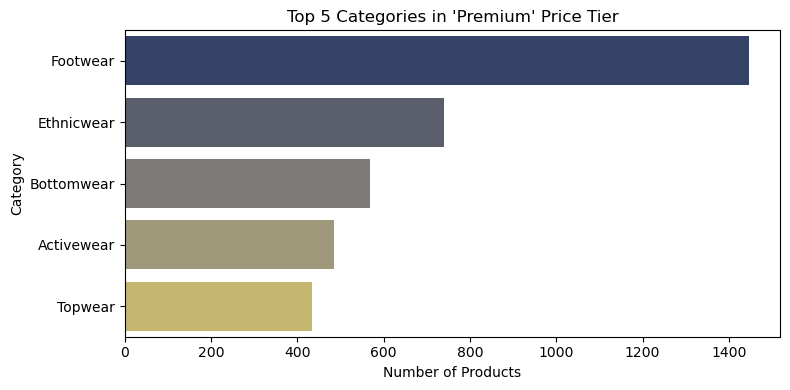

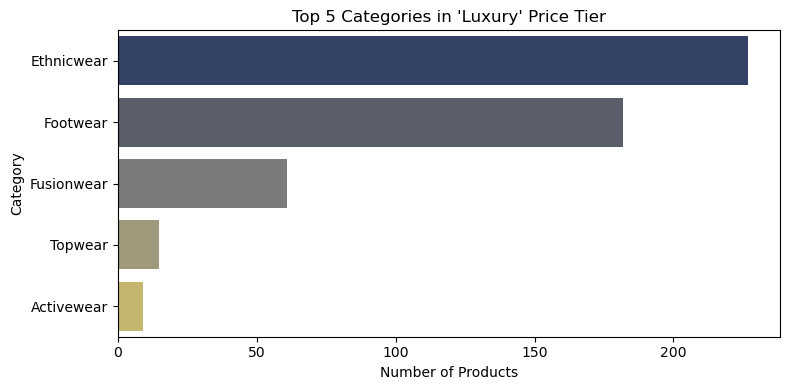

In [111]:
# Get unique tiers
tiers = df["Price_Tier"].unique()


# Plot top 5 categories for each tier
for tier in tiers:
    tier_df = df[df["Price_Tier"] == tier]
    
    top5 = (
        tier_df["Category"]
        .value_counts()
        .head(5)
        .reset_index()
    )
    
    top5.columns = ["Category", "Product_Count"]
    
    # Plot
    plt.figure(figsize=(8, 4))
    sns.barplot(data=top5, x="Product_Count", y="Category", palette="cividis")
    plt.title(f"Top 5 Categories in '{tier.capitalize()}' Price Tier")
    plt.xlabel("Number of Products")
    plt.ylabel("Category")
    plt.tight_layout()
    plt.show()

### Product Analysis

#### most common product types

In [77]:
# Count most frequent product names/types
most_common_products = df["Product_Name"].value_counts().head(10)

# Display result
print("🔝 Top 10 Most Common Product Types:")
print(most_common_products)

🔝 Top 10 Most Common Product Types:
Product_Name
Crew-Neck T-shirt         2312
Straight Kurta            2126
Fit Shirt                 2117
Polo T-shirt              1126
A-line Kurta               803
Sports Shoes               779
Fit Jeans                  755
Flat Sandals               537
Thong-Strap Flip-Flops     516
Running Shoes              503
Name: count, dtype: int64


#### total product as per category

In [78]:
# Count total products by category
category_counts = df["Category"].value_counts().reset_index()
category_counts.columns = ["Category", "Product_Count"]

# Display the top rows
print(category_counts.head(10))


      Category  Product_Count
0      Topwear           7110
1  Westernwear           6641
2     Footwear           6030
3   Ethnicwear           5265
4   Bottomwear           2984
5   Activewear           2134
6   Fusionwear            997
7     Lingerie            325
8    Innerwear             96


#### top 10 product with high_discount tier

In [79]:
# Filter top 10 products in High Discount Tier
top10_high_discount = df[df["Discount_Tier"] == "Heavy discount"] \
                        .sort_values(by="Discount_Percentage", ascending=False) \
                        .head(10)[["Product_Name", "Brand", "Category", "Discount_Percentage"]]

# Show result
print("🔝 Top 10 Products with High Discount Tier:")
print(top10_high_discount)

🔝 Top 10 Products with High Discount Tier:
            Product_Name    Brand    Category  Discount_Percentage
21728      Slip-On Boots  catwalk    Footwear                85.01
21652       Casual Shoes  catwalk    Footwear                84.01
17243       A-line Kurta  swadesh  Ethnicwear                80.00
21063         Boat Shoes  catwalk    Footwear                80.00
17612       Flared Kurta  swadesh  Ethnicwear                80.00
19723       Flared Kurta  swadesh  Ethnicwear                80.00
21073         Boat Shoes  catwalk    Footwear                80.00
17557  Brocade Angarakha  swadesh  Ethnicwear                80.00
17540       A-line Kurta  swadesh  Ethnicwear                80.00
21617    Strappy Sandals  catwalk    Footwear                80.00


#### Light discount on premium product

In [80]:
# Filter: Premium Price Tier & Low Discount Tier
light_discount_premium = df[(df["Price_Tier"] == "premium") & (df["Discount_Tier"] == "Light discount")]

# Select relevant columns
light_discount_premium = light_discount_premium[["Product_Name", "Brand", "Category", "Original_Price", "Discount_Percentage"]]

# Display top results
print("Premium Products with Light Discount:")
print(light_discount_premium.head(10))

Premium Products with Light Discount:
              Product_Name       Brand    Category  Original_Price  \
822           Sports Shoes        fila  Activewear          3099.0   
1052         Running Shoes        fila  Activewear          3099.0   
1097         Lace-Up Shoes        fila  Activewear          3099.0   
1100          Sports Shoes        fila  Activewear          2799.0   
1124          Casual Shoes        puma  Activewear          2799.0   
1436  Mid-Distressed Jeans  lee-cooper  Bottomwear          2199.0   
2020             Fit Jeans        duke  Bottomwear          2349.0   
2080             Fit Jeans        duke  Bottomwear          2349.0   
2110             Fit Jeans        duke  Bottomwear          2499.0   
2216             Fit Jeans        duke  Bottomwear          2249.0   

      Discount_Percentage  
822                 15.00  
1052                15.00  
1097                10.00  
1100                10.00  
1124                10.00  
1436                10.

#### top 10 most expensive product

In [81]:
top_highest_priced = df.sort_values(by="Original_Price", ascending=False).head(10)

# Display relevant details
print("Top 10 Highest-Priced Products:")
print(top_highest_priced[["Brand", "Product_Name", "Original_Price", "Category", "Category_by_gender"]])

Top 10 Highest-Priced Products:
         Brand      Product_Name  Original_Price    Category  \
24168        w      Flared Dress         19999.0  Fusionwear   
19423        w      Flared Kurta         16999.0  Ethnicwear   
6966   k-swiss      Casual Shoes         14999.0    Footwear   
24459        w  Embellished Gown         14999.0  Fusionwear   
6734   k-swiss      Casual Shoes         14999.0    Footwear   
6997   k-swiss      Casual Shoes         14999.0    Footwear   
18935     biba      A-line Kurta         13950.0  Ethnicwear   
19588        w         Kurta Set         12999.0  Ethnicwear   
18467        w         Kurta Set         12999.0  Ethnicwear   
7012   k-swiss      Casual Shoes         12999.0    Footwear   

      Category_by_gender  
24168              Women  
19423              Women  
6966                 Men  
24459              Women  
6734                 Men  
6997                 Men  
18935              Women  
19588              Women  
18467              W

#### top 10 brand having highest number of product @

In [82]:
# Count number of products per brand
top_brands = df["Brand"].value_counts().head(10).reset_index()
top_brands.columns = ["Brand", "Product_Count"]

# Display result
print("Top 10 Brands by Number of Products:")
print(top_brands)

Top 10 Brands by Number of Products:
                Brand  Product_Count
0           performax           3029
1          teamspirit           1908
2                dnmx           1757
3             netplay           1698
4  avaasa-mix-n-match           1507
5        john-players           1224
6         hi-attitude           1191
7                   w           1179
8                 fig           1110
9          lee-cooper            927


#### top 5 product of each price tier @

In [83]:
top5_by_tier = (
    df.sort_values(by="Original_Price", ascending=False)
      .groupby("Price_Tier")
      .head(5)
      .sort_values(by=["Price_Tier", "Original_Price"], ascending=[True, False])
)

# Select relevant columns
top5_by_tier = top5_by_tier[["Product_Name", "Brand", "Category", "Price_Tier", "Original_Price"]]

# Display result
print("Top 5 Products by Each Price Tier:")
print(top5_by_tier)

Top 5 Products by Each Price Tier:
                 Product_Name               Brand    Category  \
24168            Flared Dress                   w  Fusionwear   
19423            Flared Kurta                   w  Ethnicwear   
6966             Casual Shoes             k-swiss    Footwear   
24459        Embellished Gown                   w  Fusionwear   
6734             Casual Shoes             k-swiss    Footwear   
17829          Straight Kurta  avaasa-mix-n-match  Ethnicwear   
1598             Print Shorts          teamspirit  Bottomwear   
20863            Ballet Flats         hi-attitude    Footwear   
6274   Thong-Strap Flip-Flops         christofano    Footwear   
20859            Ballet Flats         hi-attitude    Footwear   
5779             Flat Sandals              clarks    Footwear   
633             Lace-Up Shoes           performax  Activewear   
18526             With Blouse             vivitka  Ethnicwear   
21524           Slip-On Shoes              clarks    Fo

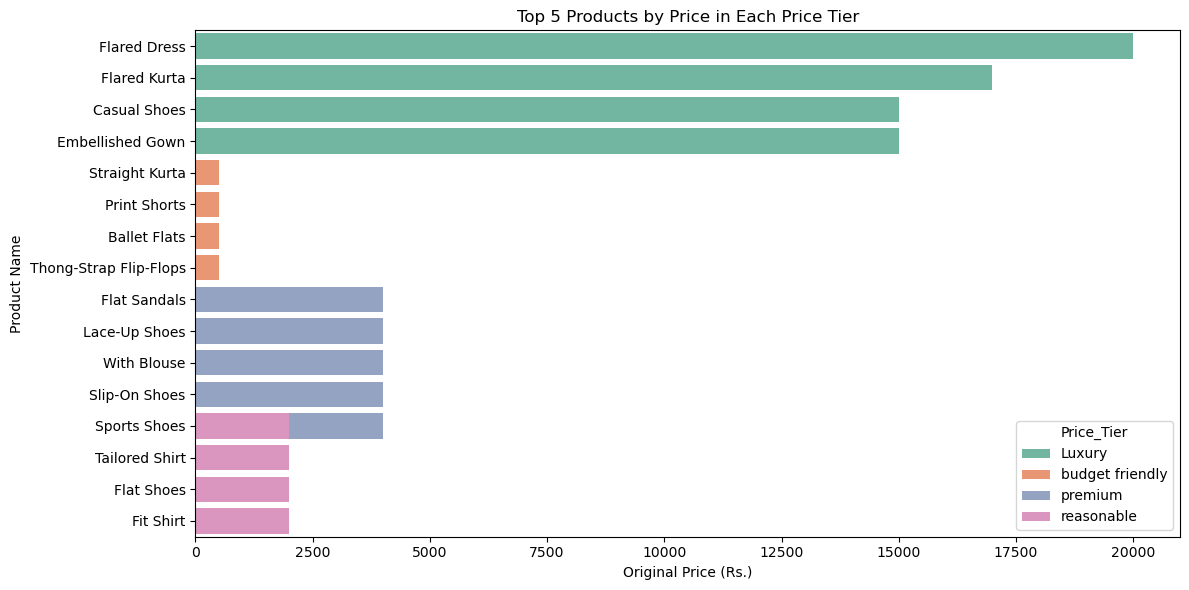

In [84]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top5_by_tier, x="Original_Price", y="Product_Name", hue="Price_Tier", dodge=False, palette="Set2")
plt.title("Top 5 Products by Price in Each Price Tier")
plt.xlabel("Original Price (Rs.)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

## 🔍 Dashboard

### 🛍️ Dashboard which take input as product name or brand and show all product with its price

In [85]:
# User input
search_term = input("Enter Product Name or Brand: ")

# Filter DataFrame
filtered_df = df[
    df["Brand"].str.contains(search_term, case=False, na=False) |
    df["Product_Name"].str.contains(search_term, case=False, na=False)
]

# Show results
if not filtered_df.empty:
    print(filtered_df[["Brand", "Product_Name", "Original_Price", "Discount_Price"]])
else:
    print("No products found matching your input.")

Enter Product Name or Brand:  puma


      Brand            Product_Name  Original_Price  Discount_Price
73     puma     Thong-Strap Sandals          1499.0          1049.0
706    puma            Sports Shoes          2999.0          1799.0
707    puma           Running Shoes          2999.0          1649.0
935    puma  Thong-Strap Flip-Flops           499.0           374.0
1124   puma            Casual Shoes          2799.0          2519.0
...     ...                     ...             ...             ...
7006   puma            Sports Shoes          3999.0          2999.0
7009   puma           Running Shoes          4999.0          3749.0
7014   puma           Running Shoes          4299.0          1935.0
11583  puma        Slip-On Sneakers          3999.0          1600.0
11588  puma        Slip-On Sneakers          3999.0          1600.0

[69 rows x 4 columns]


#### 📈Users can see Original vs Discounted Price side-by-side, helping them instantly understand how much they save.
#### 📈Users can also spot if a brand frequently offers large discounts (price-sensitive targeting) or rarely discounts (premium positioning).
#### 📈For a retailer or e-commerce analyst, this dashboard is a great tool to:
####     1.Monitor competitor pricing
#### 2.Detect pricing anomalies
#### 3.Identify seasonal trends in discounting